__Data preparation and customer analytics (task 1)__

__Analyst: Albert Dellor__

__Email: dell.datascience@gmail.com__

__Table of Contents__

<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#EDA">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Strategy & Conclusions</a></li>
</ul>

# __Introduction__
<a id="intro"></a>

Supermarkets will regularly change their store layouts, product selections, prices and promotions. This is to satisfy their customer’s changing needs and preferences, keep up with the increasing competition in the market or to capitalise on new opportunities. I evaluate and analyse the performance of change and recommend whether it has been successful. 

I have been approached by my client, the Category Manager for Chips, who wants to better understand the types of customers who purchase Chips and their purchasing behaviour within the region. The insights from this analysis will feed into the supermarket’s strategic plan for the chip category in the next half year.

This project aims to analyse client's transaction dataset and identify customer purchasing behaviours to generate insights and provide commercial recommendations.

## __Data description__
This dataset was made available by Quantium as part of their Data Analytics Virtual Experience program. It consists of transaction dataset; QVI_transaction_data.xlsx and and behaviour dataset; QVI_purchase_behaviour.csv data sets.

QVI_purchase_behaviour.csv has 726373 by 3 rows and columns respectively.

- `LYLTY_CARD_NBR`: Loyalty card number of customers
- `LIFESTAGE`: life stage of customers
- `PREMIUM_CUSTOMER`: purchasing status of customers

QVI_transaction_data.xlsx has 264836 by 8 rows and columns respectively.

- `DATE`: Data of transaction
- `STORE_NBR`: Store within which transaction took place
- `LYLTY_CARD_NBR`: Loyaity card number of customer
- `TXN_ID`: Transaction Identification
- `PROD_NBR`: Product number
- `PROD_NAME`: Product name
- `PROD_QTY`: Quantity of product purchased
- `TOT_SALES`: Total cost of product sold

# __Data Wrangling__
<a id="Wrangling"></a>

## __Import all packages and set plots to be embedded inline__

In [1]:
!pip install wordcloud openpyxl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import requests
from IPython.display import Image
from wordcloud import WordCloud
from collections import Counter
import matplotlib.dates as dates
%matplotlib inline
from scipy.signal import find_peaks
from scipy.stats import ttest_ind

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 461.4/461.4 kB 34.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.0/250.0 kB 39.8 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip


## __Loading the dataset: Get the URL of dataset. Create request, download transaction and purchase behaviour datasets__

In [16]:
urls = ['https://cdn.theforage.com/vinternships/companyassets/32A6DqtsbF7LbKdcq/QVI_transaction_data.xlsx',
        'https://cdn.theforage.com/vinternships/companyassets/32A6DqtsbF7LbKdcq/QVI_purchase_behaviour.csv']

for url in urls:
    data = requests.get(url)
    with open(url.split('/')[-1], mode = 'wb') as file:
        file.write(data.content)

## __Loading Datasets__

In [17]:
transactions = pd.read_excel('/data/notebook_files/QVI_transaction_data.xlsx')
purchase_behavor = pd.read_csv('/data/notebook_files/QVI_purchase_behaviour.csv')

## __Data Assessment__
### __Visual assessment and programmatic assessments were conducted to detect quality and tidiness issues with both dataset__

 - Visual assessment of data in Microsoft excell
 - Programmatic assessment in python

## __Assessment: QVI_purchase_behaviour.csv__

In [18]:
purchase_behavor.sample(5)

LYLTY_CARD_NBR 
 LIFESTAGE 
 PREMIUM_CUSTOMER 
 
 
 
 
 57050 
 215304 
 OLDER SINGLES/COUPLES 
 Budget 
 
 
 22133 
 80224 
 MIDAGE SINGLES/COUPLES 
 Mainstream 
 
 
 58285 
 220197 
 OLDER SINGLES/COUPLES 
 Budget 
 
 
 14728 
 54182 
 OLDER FAMILIES 
 Mainstream 
 
 
 23865 
 87070 
 RETIREES 
 Mainstream

## __Dimensions of data set__

In [19]:
print('Rows: {}\nColumns: {}'.format(purchase_behavor.shape[0]\
                                     ,purchase_behavor.shape[1]))

Rows: 72637
Columns: 3


## __Missing values and data types__

In [20]:
purchase_behavor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


## __Number of unique values in PREMIUM_CUSTOMER and LIFESTAGE__

In [21]:
purchase_behavor.PREMIUM_CUSTOMER.nunique(),\
purchase_behavor.LIFESTAGE.nunique()

(3, 7)

In [22]:
purchase_behavor.PREMIUM_CUSTOMER.unique().tolist()

['Premium', 'Mainstream', 'Budget']

In [23]:
purchase_behavor.LIFESTAGE.unique().tolist()

['YOUNG SINGLES/COUPLES',
 'YOUNG FAMILIES',
 'OLDER SINGLES/COUPLES',
 'MIDAGE SINGLES/COUPLES',
 'NEW FAMILIES',
 'OLDER FAMILIES',
 'RETIREES']

### __NB__:
The data consists of __72637 rows__ by __3 columns__. There are __no missing vaules__. However, __PREMIUM_CUSTOMER__ and __LIFESTAGE__ columns have few number of unique values, thus can be converted from string object to categorical date type as they hold no ordinal value.

## __Assessment: QVI_transaction_data.xlsx__

In [24]:
transactions.sample(5)

DATE 
 STORE_NBR 
 LYLTY_CARD_NBR 
 TXN_ID 
 PROD_NBR 
 PROD_NAME 
 PROD_QTY 
 TOT_SALES 
 
 
 
 
 175355 
 43400 
 68 
 68138 
 65520 
 25 
 Pringles SourCream Onion 134g 
 1 
 3.7 
 
 
 167997 
 43318 
 222 
 222050 
 221787 
 95 
 Sunbites Whlegrn Crisps Frch/Onin 90g 
 2 
 3.4 
 
 
 126212 
 43521 
 125 
 125243 
 129269 
 42 
 Doritos Corn Chip Mexican Jalapeno 150g 
 2 
 7.8 
 
 
 104651 
 43359 
 72 
 72110 
 71058 
 75 
 Cobs Popd Sea Salt Chips 110g 
 2 
 7.6 
 
 
 129161 
 43413 
 174 
 174315 
 175433 
 15 
 Twisties Cheese 270g 
 2 
 9.2

## __Dimensions of data set__

In [25]:
print('Rows: {}\nColumns: {}'.format(transactions.shape[0],\
                                     transactions.shape[1]))

Rows: 264836
Columns: 8


## __Missing values and data types__

In [26]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


## __Descriptive statistics__

In [27]:
transactions.describe()[['PROD_QTY','TOT_SALES']]

PROD_QTY 
 TOT_SALES 
 
 
 
 
 count 
 264836.000000 
 264836.000000 
 
 
 mean 
 1.907309 
 7.304200 
 
 
 std 
 0.643654 
 3.083226 
 
 
 min 
 1.000000 
 1.500000 
 
 
 25% 
 2.000000 
 5.400000 
 
 
 50% 
 2.000000 
 7.400000 
 
 
 75% 
 2.000000 
 9.200000 
 
 
 max 
 200.000000 
 650.000000

## __check for duplicates.__
__The only unique identifier in dataset is TXN_ID (transaction id).__
__Thus is used to find duplicates__

In [28]:
transactions[transactions.duplicated()]

DATE 
 STORE_NBR 
 LYLTY_CARD_NBR 
 TXN_ID 
 PROD_NBR 
 PROD_NAME 
 PROD_QTY 
 TOT_SALES 
 
 
 
 
 124845 
 43374 
 107 
 107024 
 108462 
 45 
 Smiths Thinly Cut Roast Chicken 175g 
 2 
 6.0

## __Further investigate the transaction ID__

In [29]:
transactions.query("TXN_ID == 108462")[['TXN_ID','PROD_NAME','PROD_QTY','TOT_SALES']]

TXN_ID 
 PROD_NAME 
 PROD_QTY 
 TOT_SALES 
 
 
 
 
 124843 
 108462 
 Smiths Thinly Cut Roast Chicken 175g 
 2 
 6.0 
 
 
 124844 
 108462 
 Cheetos Chs & Bacon Balls 190g 
 2 
 6.6 
 
 
 124845 
 108462 
 Smiths Thinly Cut Roast Chicken 175g 
 2 
 6.0

### __NB__
There are __no missing data__. __PROD_QTY and TOT_SALES have 75% of entire data being under 2 and 9.2 respectively__, however the maximun values are 200 and 650 respectively, there might be outliers present. Further investigation reveal that there was double recording of a transaction involving __Smiths Thinly Cut Roast Chicken 175g__.

## __Summary of assessment__

Transaction data (unclean)

### __Tidiness issues__
 1. Product name contains product mass variable as well, thus must be separated into respective columns as each variable must form exclusive column to comply with data tidiness standards.
 
 2. Presence of duplicate transaction involving Smiths Thinly Cut Roast Chicken 175g. All entries must be unique. Thus duplicates are dropped.
 
 3. Absence of unit cost column.
 
 
### __Quality issues__

 4. PROD_QTY and TOT_SALES may have outliers.
 
 5. product name has inconsistent spacing thus must be formated to comply with data quality standards.
 
 6. Product name may contain irrelevant products other than chips.
 
 7. date format is in Excel serial number instead of pandas datetime object.
 
 8. convert `PREMIUM_CUSTOMER` and `LIFESTAGE` columns to categorical data type.
 
Purchase behavior data(clean) 

## __Data Cleaning__
In this sectionall the data issues outlined in assesment stage are cleaned.

In [30]:
# make copies of both data sets
purchase_behavor_copy = purchase_behavor.copy()
transactions_copy = transactions.copy()

### __Issue #1: separate product mass and product name into deparate columns__

In [31]:
regex = r'(\d+)(g|G)'
transactions_copy['PACK_SIZE'] = pd.to_numeric(
                                    transactions_copy.PROD_NAME\
                                    .str.extract(regex)[0])

### __Issue #2: Remove duplicates in data set__

In [32]:
transactions_copy.drop_duplicates(inplace = True)

### __Issue #3: Add a unit cost column__

In [33]:
transactions_copy['UNIT_COST'] = np.divide(transactions_copy.TOT_SALES,transactions_copy.PROD_QTY)

### __Issue #7: Format date from Excel serial number to  pandas datetime object__

In [34]:
transactions_copy.DATE = pd.to_datetime(transactions_copy.DATE, unit='d',\
                         origin=pd.Timestamp('1899-12-30'))

### __Issue #4: PROD_QTY and TOT_SALES may have outliers__

In [35]:
transactions_copy.nlargest(6,'TOT_SALES')[['PROD_NAME','PROD_QTY','TOT_SALES']]

PROD_NAME 
 PROD_QTY 
 TOT_SALES 
 
 
 
 
 69762 
 Dorito Corn Chp Supreme 380g 
 200 
 650.0 
 
 
 69763 
 Dorito Corn Chp Supreme 380g 
 200 
 650.0 
 
 
 5179 
 Smiths Crnkle Chip Orgnl Big Bag 380g 
 5 
 29.5 
 
 
 55558 
 Smiths Crnkle Chip Orgnl Big Bag 380g 
 5 
 29.5 
 
 
 69496 
 Smiths Crnkle Chip Orgnl Big Bag 380g 
 5 
 29.5 
 
 
 117850 
 Smiths Crnkle Chip Orgnl Big Bag 380g 
 5 
 29.5

looking at the 6 largest TOT_SALES, its evident that 650 are outliers.
To further comfirm this, it is general accepted that any data point that falls outside the range of Q1 - 1.5 x IQR to Q3 + 1.5 x IQR is considered a potential outlier.

In [36]:
stats = transactions_copy.describe()

In [37]:
def outlier(column):
    Q1 = stats.loc['25%'][column]
    Q3 = stats.loc['75%'][column]
    IQR = Q3 - Q1
    low_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    print("For {} an outlier is any value outside the range of {:.2f} and {:.2f}".\
    format(column,low_range,upper_range))

In [38]:
outlier('PROD_QTY')
outlier('TOT_SALES')

For PROD_QTY an outlier is any value outside the range of 2.00 and 2.00
For TOT_SALES an outlier is any value outside the range of -0.30 and 14.90


### __Looking at the descriptive statistics of both datasets__

In [39]:
pd.merge(pd.DataFrame(transactions_copy.PROD_QTY.describe()),\
         pd.DataFrame(transactions_copy.TOT_SALES.describe()),\
         on=pd.DataFrame(transactions_copy.TOT_SALES.describe()).index).rename(columns={'key_0':'index'})

index 
 PROD_QTY 
 TOT_SALES 
 
 
 
 
 0 
 count 
 264835.000000 
 264835.000000 
 
 
 1 
 mean 
 1.907308 
 7.304205 
 
 
 2 
 std 
 0.643655 
 3.083231 
 
 
 3 
 min 
 1.000000 
 1.500000 
 
 
 4 
 25% 
 2.000000 
 5.400000 
 
 
 5 
 50% 
 2.000000 
 7.400000 
 
 
 6 
 75% 
 2.000000 
 9.200000 
 
 
 7 
 max 
 200.000000 
 650.000000

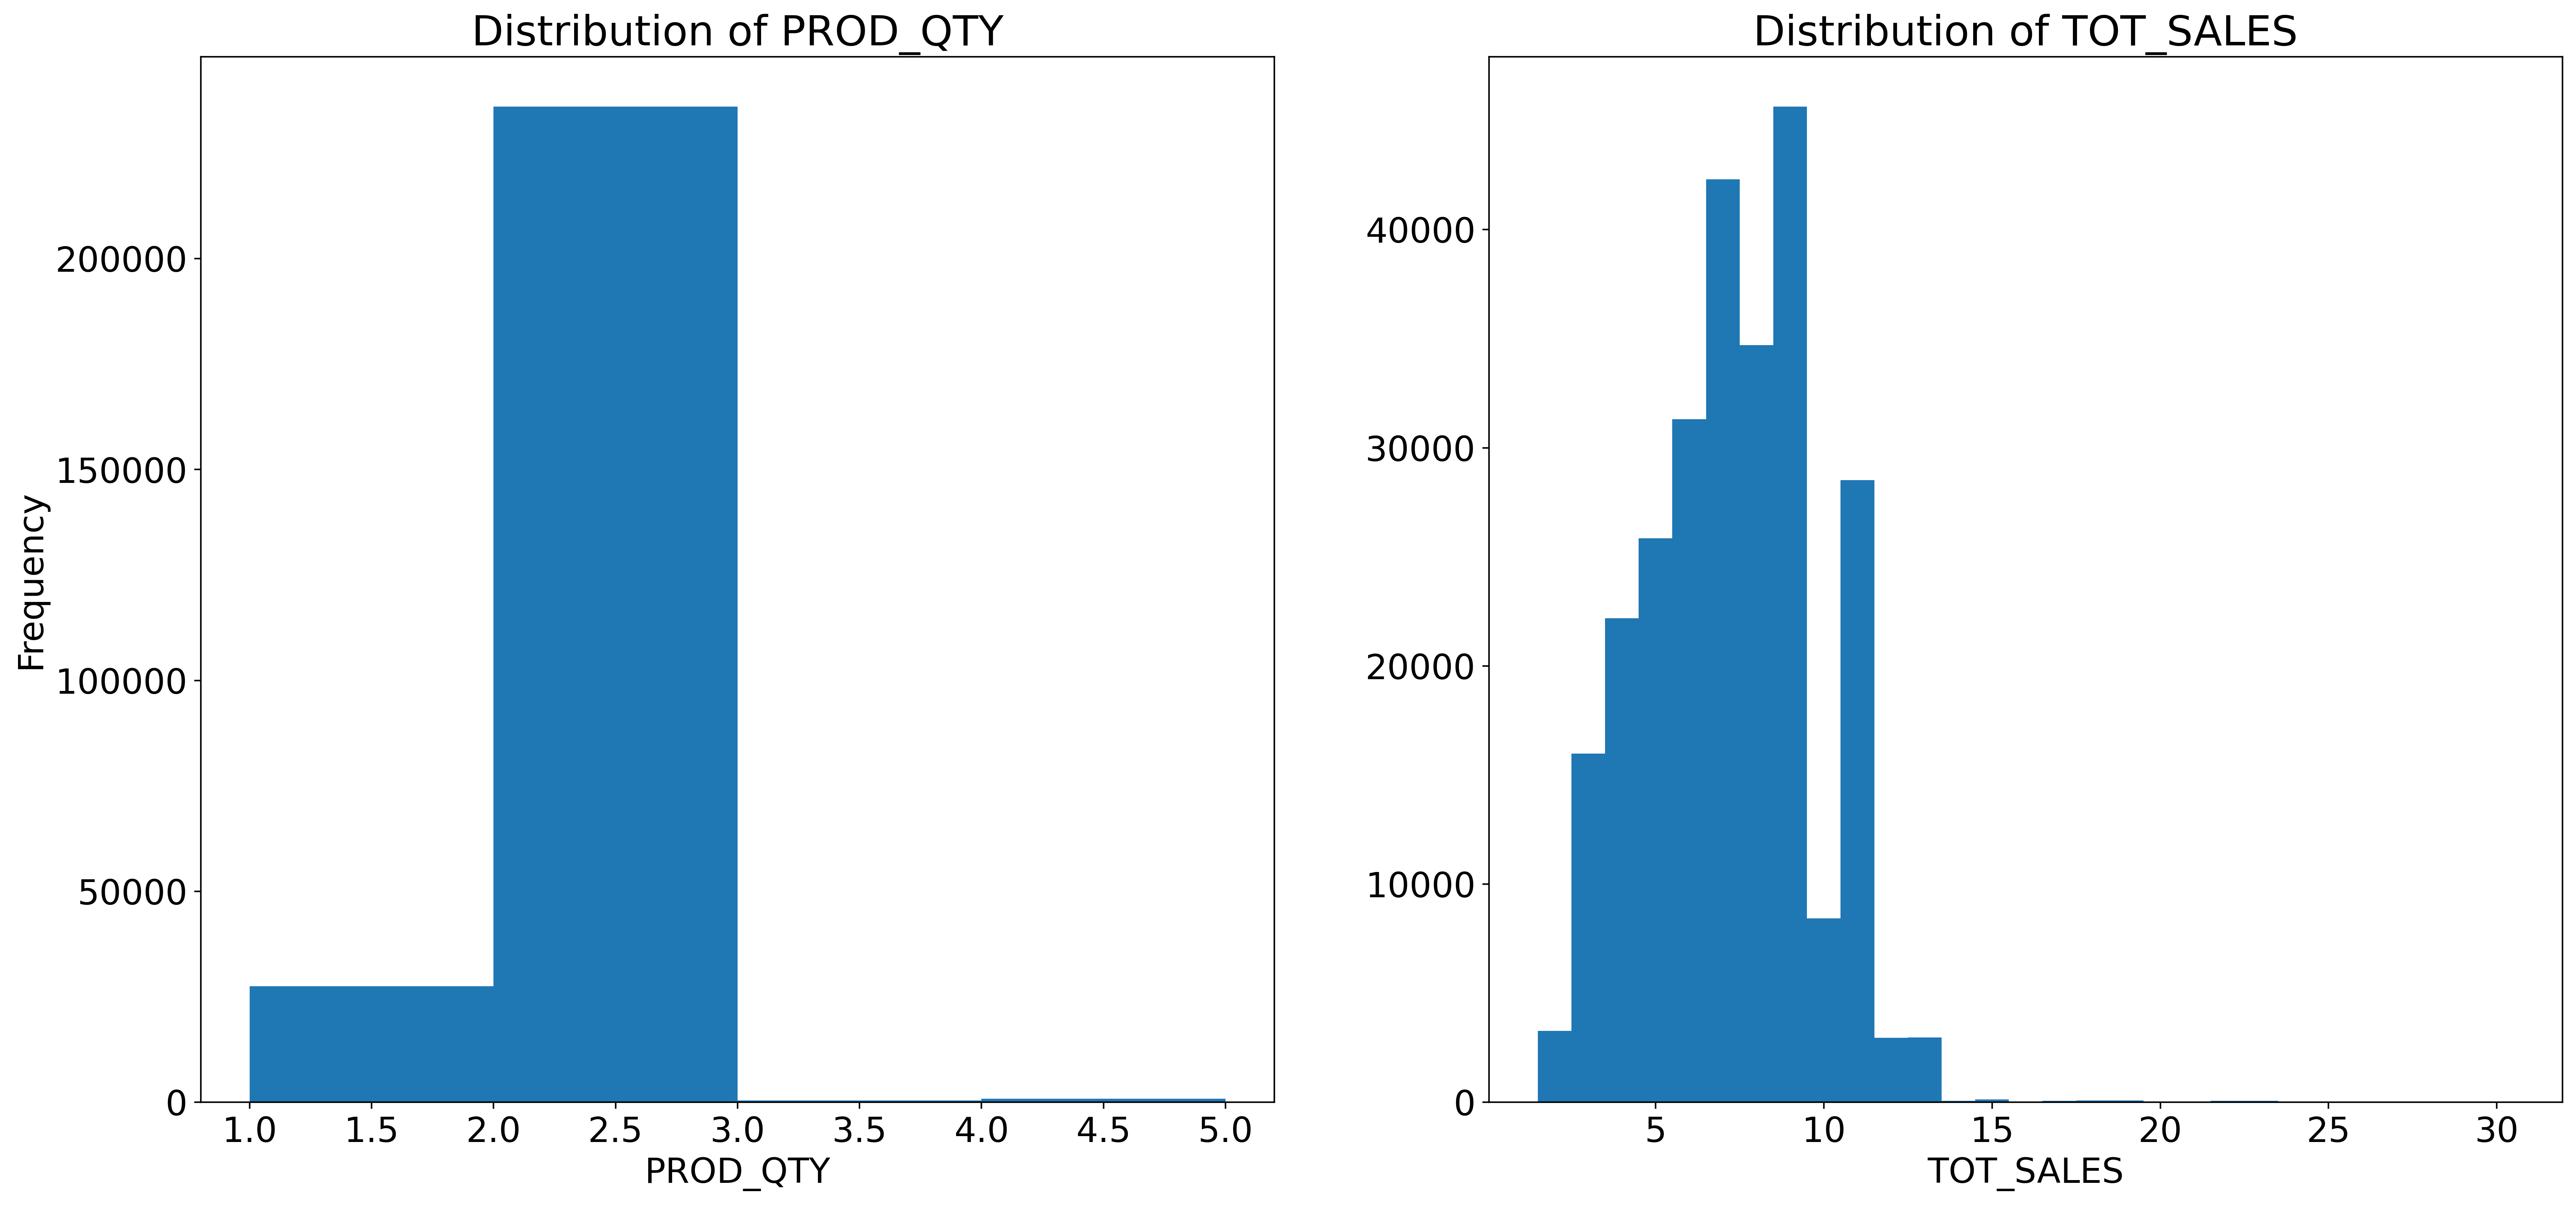

In [40]:
plt.figure(figsize=(22,10),dpi=400)
plt.rcParams['font.size'] = 18
plt.subplot(1,2,1)
bin = np.arange(1,5+1,1);
plt.hist(transactions_copy.PROD_QTY,bins=bin);
plt.xlabel('PROD_QTY');
plt.ylabel('Frequency');
plt.title('Distribution of PROD_QTY');

plt.subplot(1,2,2)
bin = np.arange(1.5, 30+1.5,1);
plt.hist(transactions_copy.TOT_SALES, bins=bin);
plt.xlabel('TOT_SALES');
plt.title('Distribution of TOT_SALES');

It is evident that a customer with loyalty card number 226000, purchased large orders on two occasions in 2018 and 2019, thus creating the outliers for PROD_QTY and corresponding TOT_SALES .

Additionally, the histograms clearly show that a majority of the data is located between 1 to 3 for PROD_QTY and 1 to 15 for TOT_SALES.

Therefore is is safe to say that 200 and 650 for PROD_QTY and TOT_SALES are outliers respectively and are removed from the datase

### __Outlier is droped from data set__

In [41]:
index = transactions_copy.query("TOT_SALES == 650").index.values
transactions_copy.drop(index,axis=0, inplace=True)

### __Issue 5: format spacing in product name__

In [43]:
transactions_copy['PROD_NAME'] = transactions_copy.PROD_NAME\
                                    .str.replace(regex, '',regex=True)\
                                    .str.replace(r'\s\s+', ' ',regex=True)\
                                    .str.replace('&', ' & ',regex=True)

### __Issue 6: examine products summary,rid it of irrelevant products__

In [44]:
def wordcloud(data):
    wordcloud = WordCloud(width = 1600, height = 1600, 
                background_color ='white', 
                min_font_size = 10).generate_from_frequencies(data)
    plt.figure(figsize = (16,8), facecolor = None,dpi=400) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.show()
    

### __Summary of individual PROD_NAME words with wordcloud__

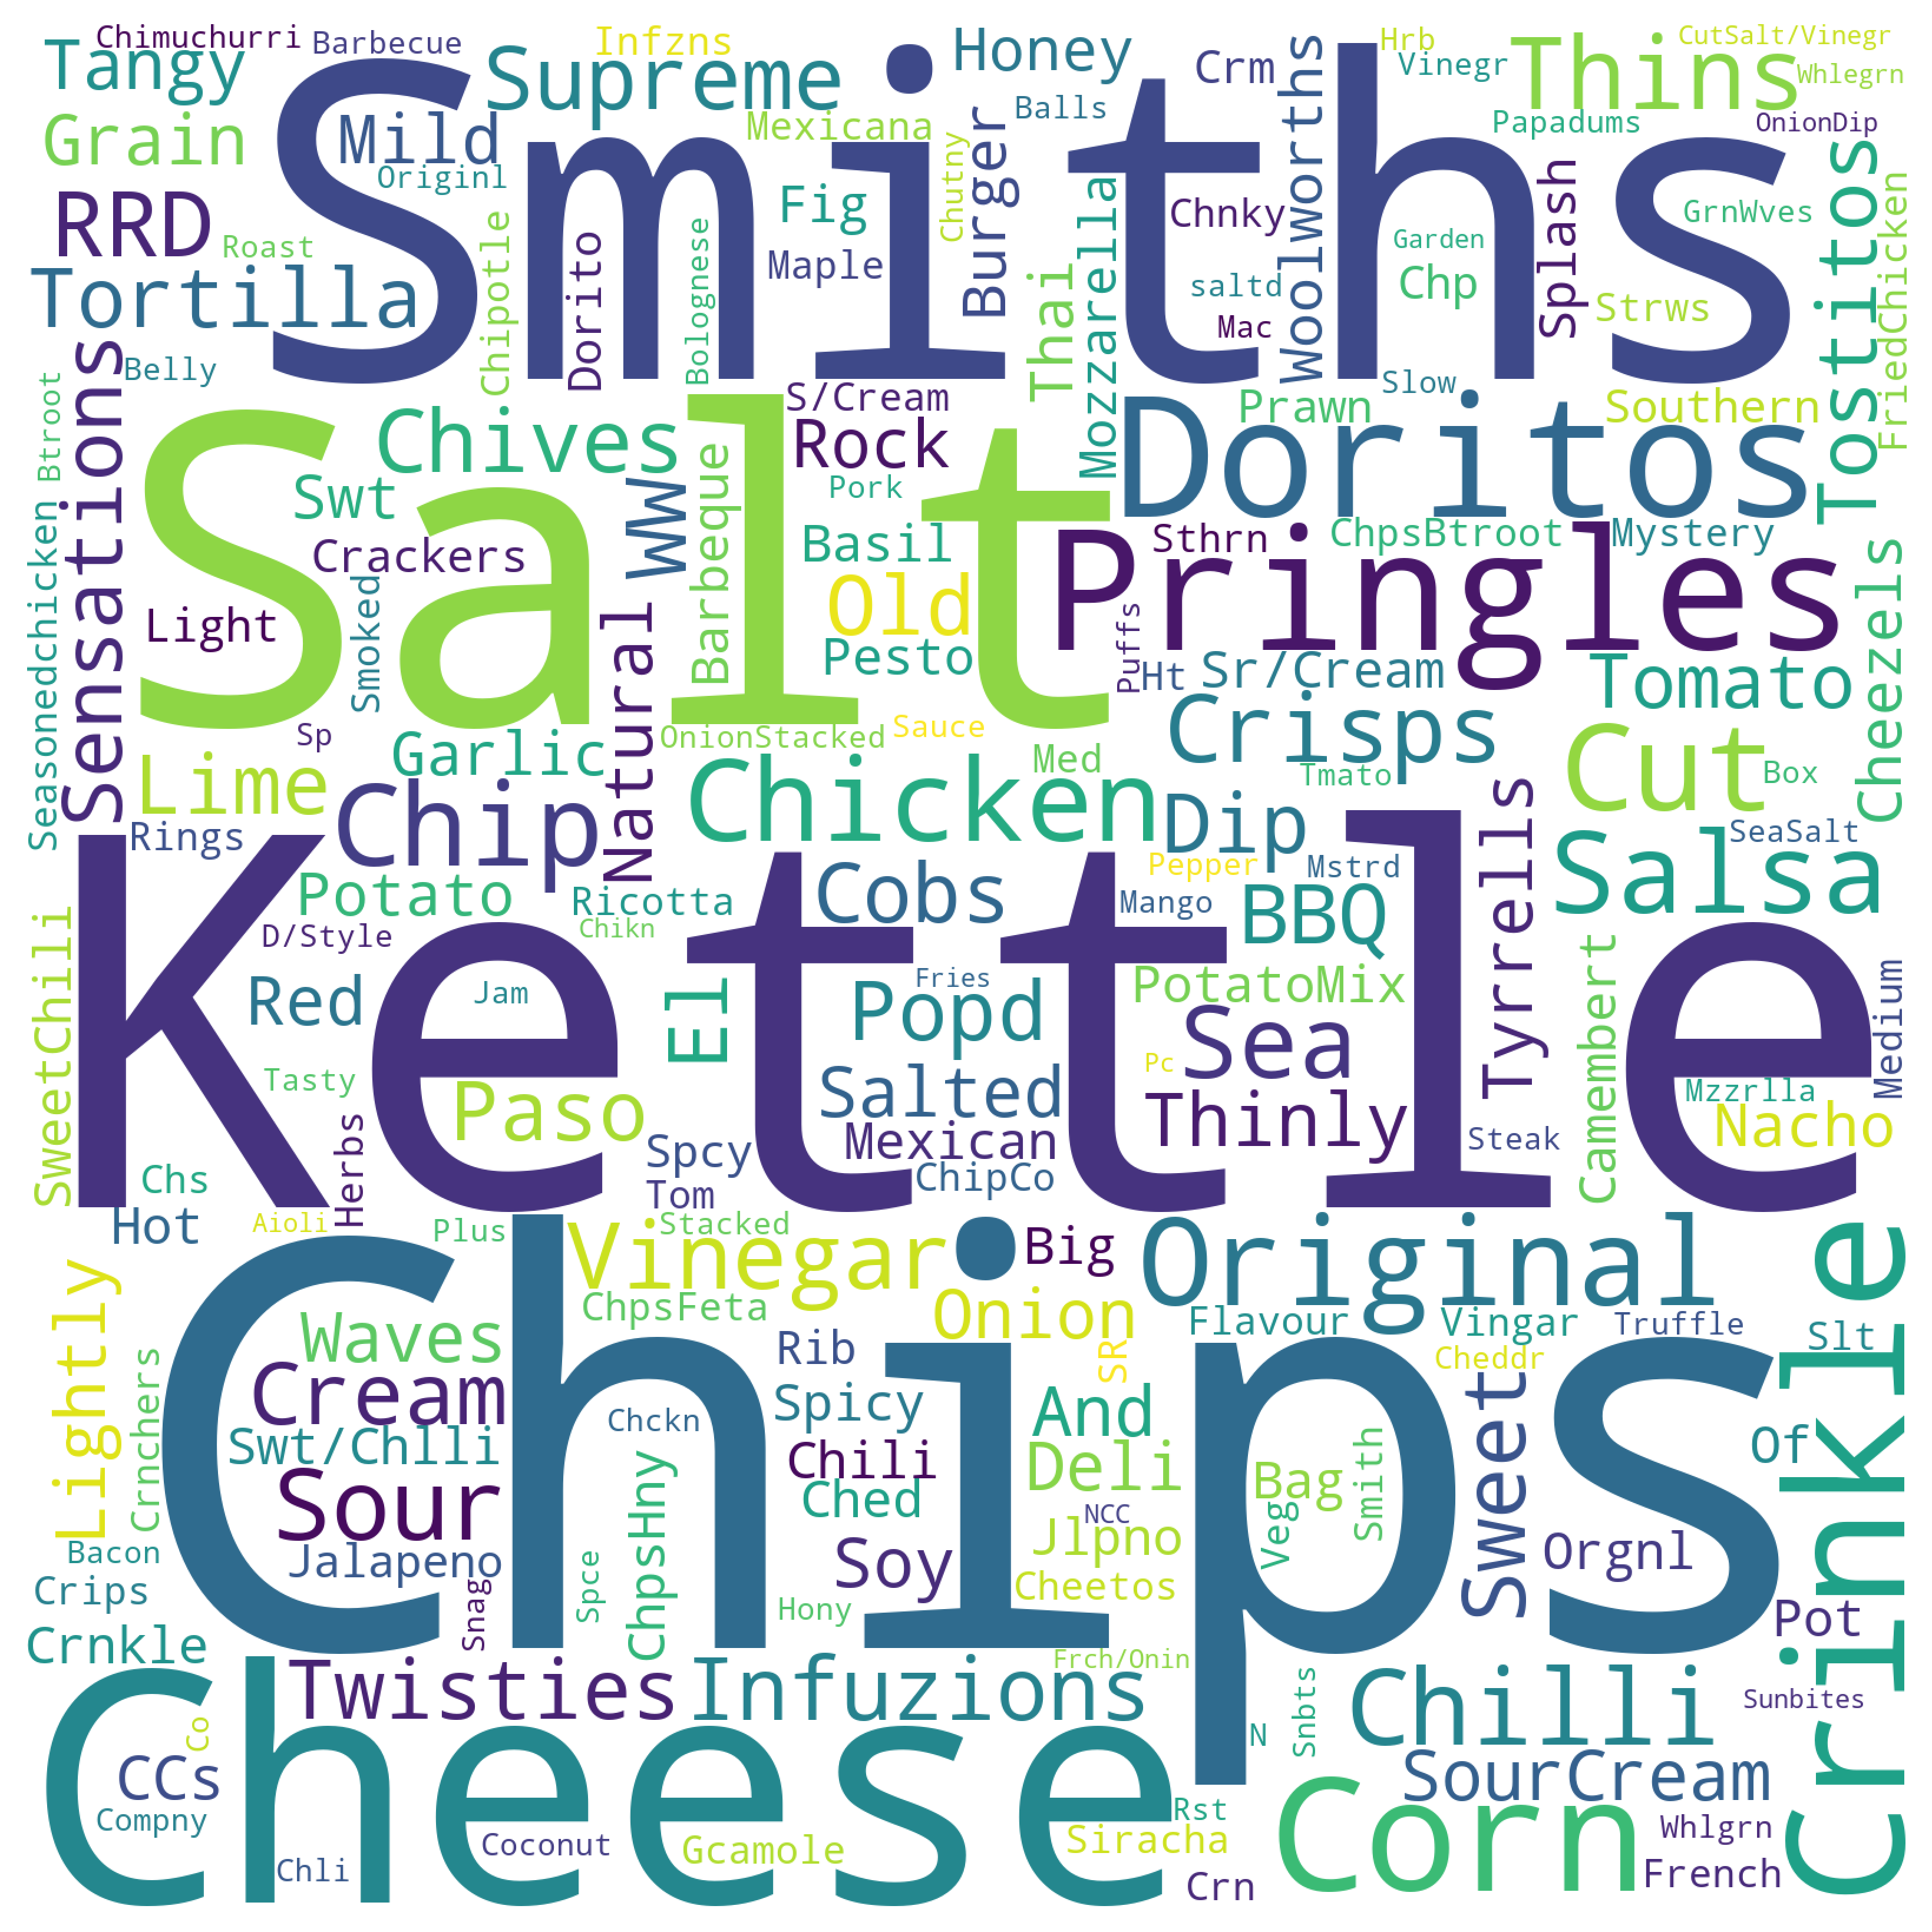

In [46]:
PROD_NAME = transactions_copy.PROD_NAME.str.replace("&","")
words = ' '.join(PROD_NAME.values).split()
data = Counter(words)
wordcloud(data)

Taking a quick glance, reveal that the column generally contains chips products. However the presence of some questionable words like __Salsa, salt, Mexican, Rock, Sea__ raise doubts and may indicate that not all products are chips.
Next entire PROD_NAMEs are summarised to get better sense of products.

### __Summary of entire  PROD_NAME products in wordcloud__

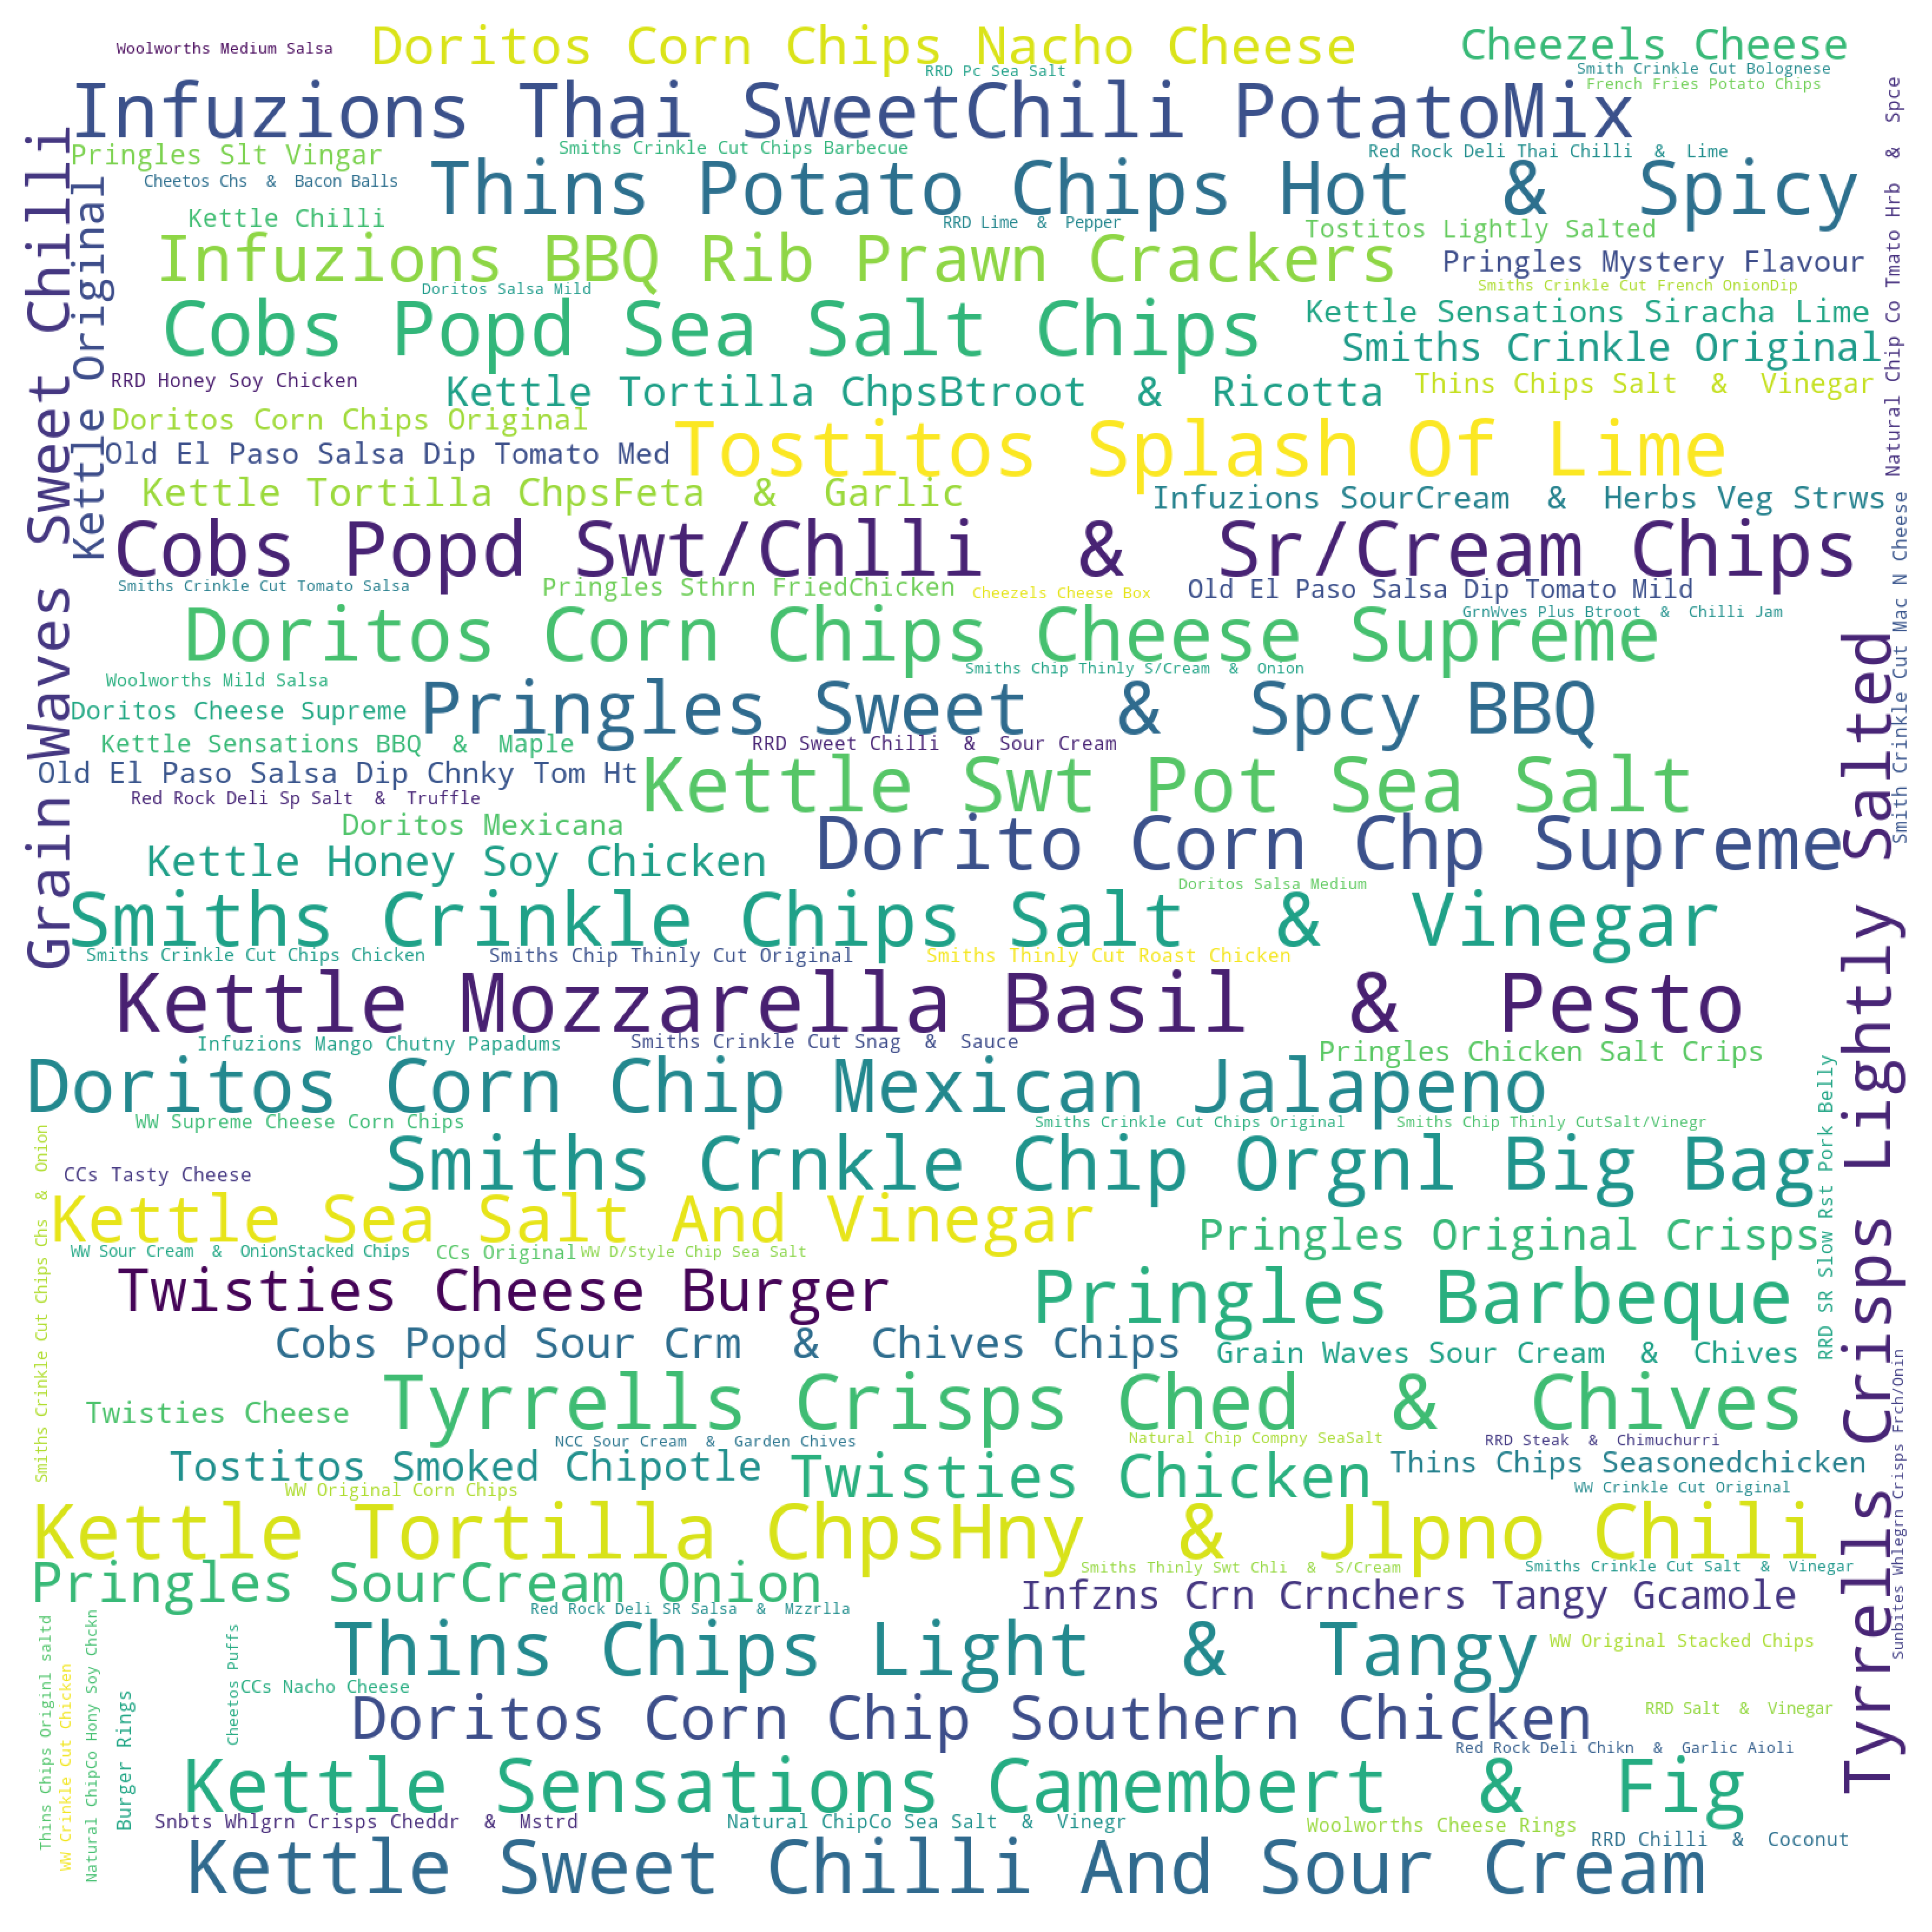

In [47]:
products = transactions_copy.PROD_NAME.value_counts().to_dict()
wordcloud(products)

It turns out that previously alarming words like __Sea, salt, Mexican, Rock etc.__ are actually part of chips product name or branding. With the exception of __salsa__ as it clearly doesn't qualify as chips and must be removed from column.

### __Identify all salsa entries__

In [48]:
salsa_df = transactions_copy[transactions_copy.PROD_NAME.\
                             str.contains('Salsa', case=False)]
total = salsa_df.PROD_NAME.value_counts().values.sum()
print('There are {} instances of irrelevant salsa products\
in dataset.\n'.format(total))
pd.DataFrame(salsa_df.PROD_NAME.value_counts()).reset_index().\
                            rename(columns={'index':'Product','PROD_NAME':'Counts'})

There are 18094 instances of irrelevant salsa productsin dataset.



Product 
 Counts 
 
 
 
 
 0 
 Old El Paso Salsa Dip Chnky Tom Ht 
 3125 
 
 
 1 
 Old El Paso Salsa Dip Tomato Med 
 3114 
 
 
 2 
 Old El Paso Salsa Dip Tomato Mild 
 3085 
 
 
 3 
 Woolworths Mild Salsa 
 1491 
 
 
 4 
 Doritos Salsa Mild 
 1472 
 
 
 5 
 Smiths Crinkle Cut Tomato Salsa 
 1470 
 
 
 6 
 Red Rock Deli SR Salsa & Mzzrlla 
 1458 
 
 
 7 
 Doritos Salsa Medium 
 1449 
 
 
 8 
 Woolworths Medium Salsa 
 1430

### __Remove 18094 instances of irrelevant salsa products from dataset__

In [49]:
salsa_index = salsa_df.index.tolist()
transactions_copy.drop(index=salsa_index, inplace=True)
print('After removing {} irrelevant sala entries,initial {} total\
                    entries reduced to {}'.\
                    format(total,transactions.shape[0],transactions_copy.shape[0]))

After removing 18094 irrelevant sala entries,initial 264836 total                    entries reduced to 246739


### __Assess the top 20 most frequent words in descending order__

In [50]:
PROD_NAME = transactions_copy.PROD_NAME.str.replace("&","")
words = ' '.join(PROD_NAME.values).split()
word_counts = Counter(words)
sorted_words = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)
for word, count in sorted_words[:20]:
    print(f'{word}: {count}')

Chips: 49770
Kettle: 41288
Salt: 27976
Cheese: 27890
Smiths: 27389
Pringles: 25102
Crinkle: 22490
Corn: 22061
Doritos: 22041
Original: 21560
Cut: 19283
Chip: 18645
Chicken: 18576
Chilli: 15390
Sea: 14145
Thins: 14075
Sour: 13882
Crisps: 12607
Vinegar: 12402
RRD: 11894


### __Issue #8: convert PREMIUM_CUSTOMER and LIFESTAGE columns to categorical data type__

In [51]:
purchase_behavor_copy.PREMIUM_CUSTOMER = purchase_behavor_copy.PREMIUM_CUSTOMER.astype('category')
purchase_behavor_copy.LIFESTAGE = purchase_behavor_copy.LIFESTAGE.astype('category')

In [52]:
purchase_behavor_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   LYLTY_CARD_NBR    72637 non-null  int64   
 1   LIFESTAGE         72637 non-null  category
 2   PREMIUM_CUSTOMER  72637 non-null  category
dtypes: category(2), int64(1)
memory usage: 709.9 KB


### __Finally merge two data sets together__

In [53]:
clean_data = pd.merge(transactions_copy, purchase_behavor_copy, left_on='LYLTY_CARD_NBR',\
                      right_on='LYLTY_CARD_NBR', how='left')

### __Dimension of final dataset__

In [54]:
clean_data.shape

(246739, 12)

### __missing values in dataset__

In [55]:
clean_data.isnull().sum()

DATE 0
STORE_NBR 0
LYLTY_CARD_NBR 0
TXN_ID 0
PROD_NBR 0
PROD_NAME 0
PROD_QTY 0
TOT_SALES 0
PACK_SIZE 0
UNIT_COST 0
LIFESTAGE 0
PREMIUM_CUSTOMER 0
dtype: int64

### __Save clean dataset__

In [56]:
clean_data.to_csv('wrangled_data.csv',index=False)

# __Exploratory Data Analysis__
<a id="EDA"></a>

## __Load final datase__

In [2]:
df = pd.read_csv('/data/notebook_files/wrangled_data.csv',parse_dates=['DATE'])

## __Assess final dataset__

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246739 entries, 0 to 246738
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   DATE              246739 non-null  datetime64[ns]
 1   STORE_NBR         246739 non-null  int64         
 2   LYLTY_CARD_NBR    246739 non-null  int64         
 3   TXN_ID            246739 non-null  int64         
 4   PROD_NBR          246739 non-null  int64         
 5   PROD_NAME         246739 non-null  object        
 6   PROD_QTY          246739 non-null  int64         
 7   TOT_SALES         246739 non-null  float64       
 8   PACK_SIZE         246739 non-null  int64         
 9   UNIT_COST         246739 non-null  float64       
 10  LIFESTAGE         246739 non-null  object        
 11  PREMIUM_CUSTOMER  246739 non-null  object        
 12  PROD_BRAND        246739 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(6), object(4)
memor

## __What is the daily number of transaction over time?__

### __Analyse daily number of transaction over time__

The average daily number of transaction is 677.8543956043956


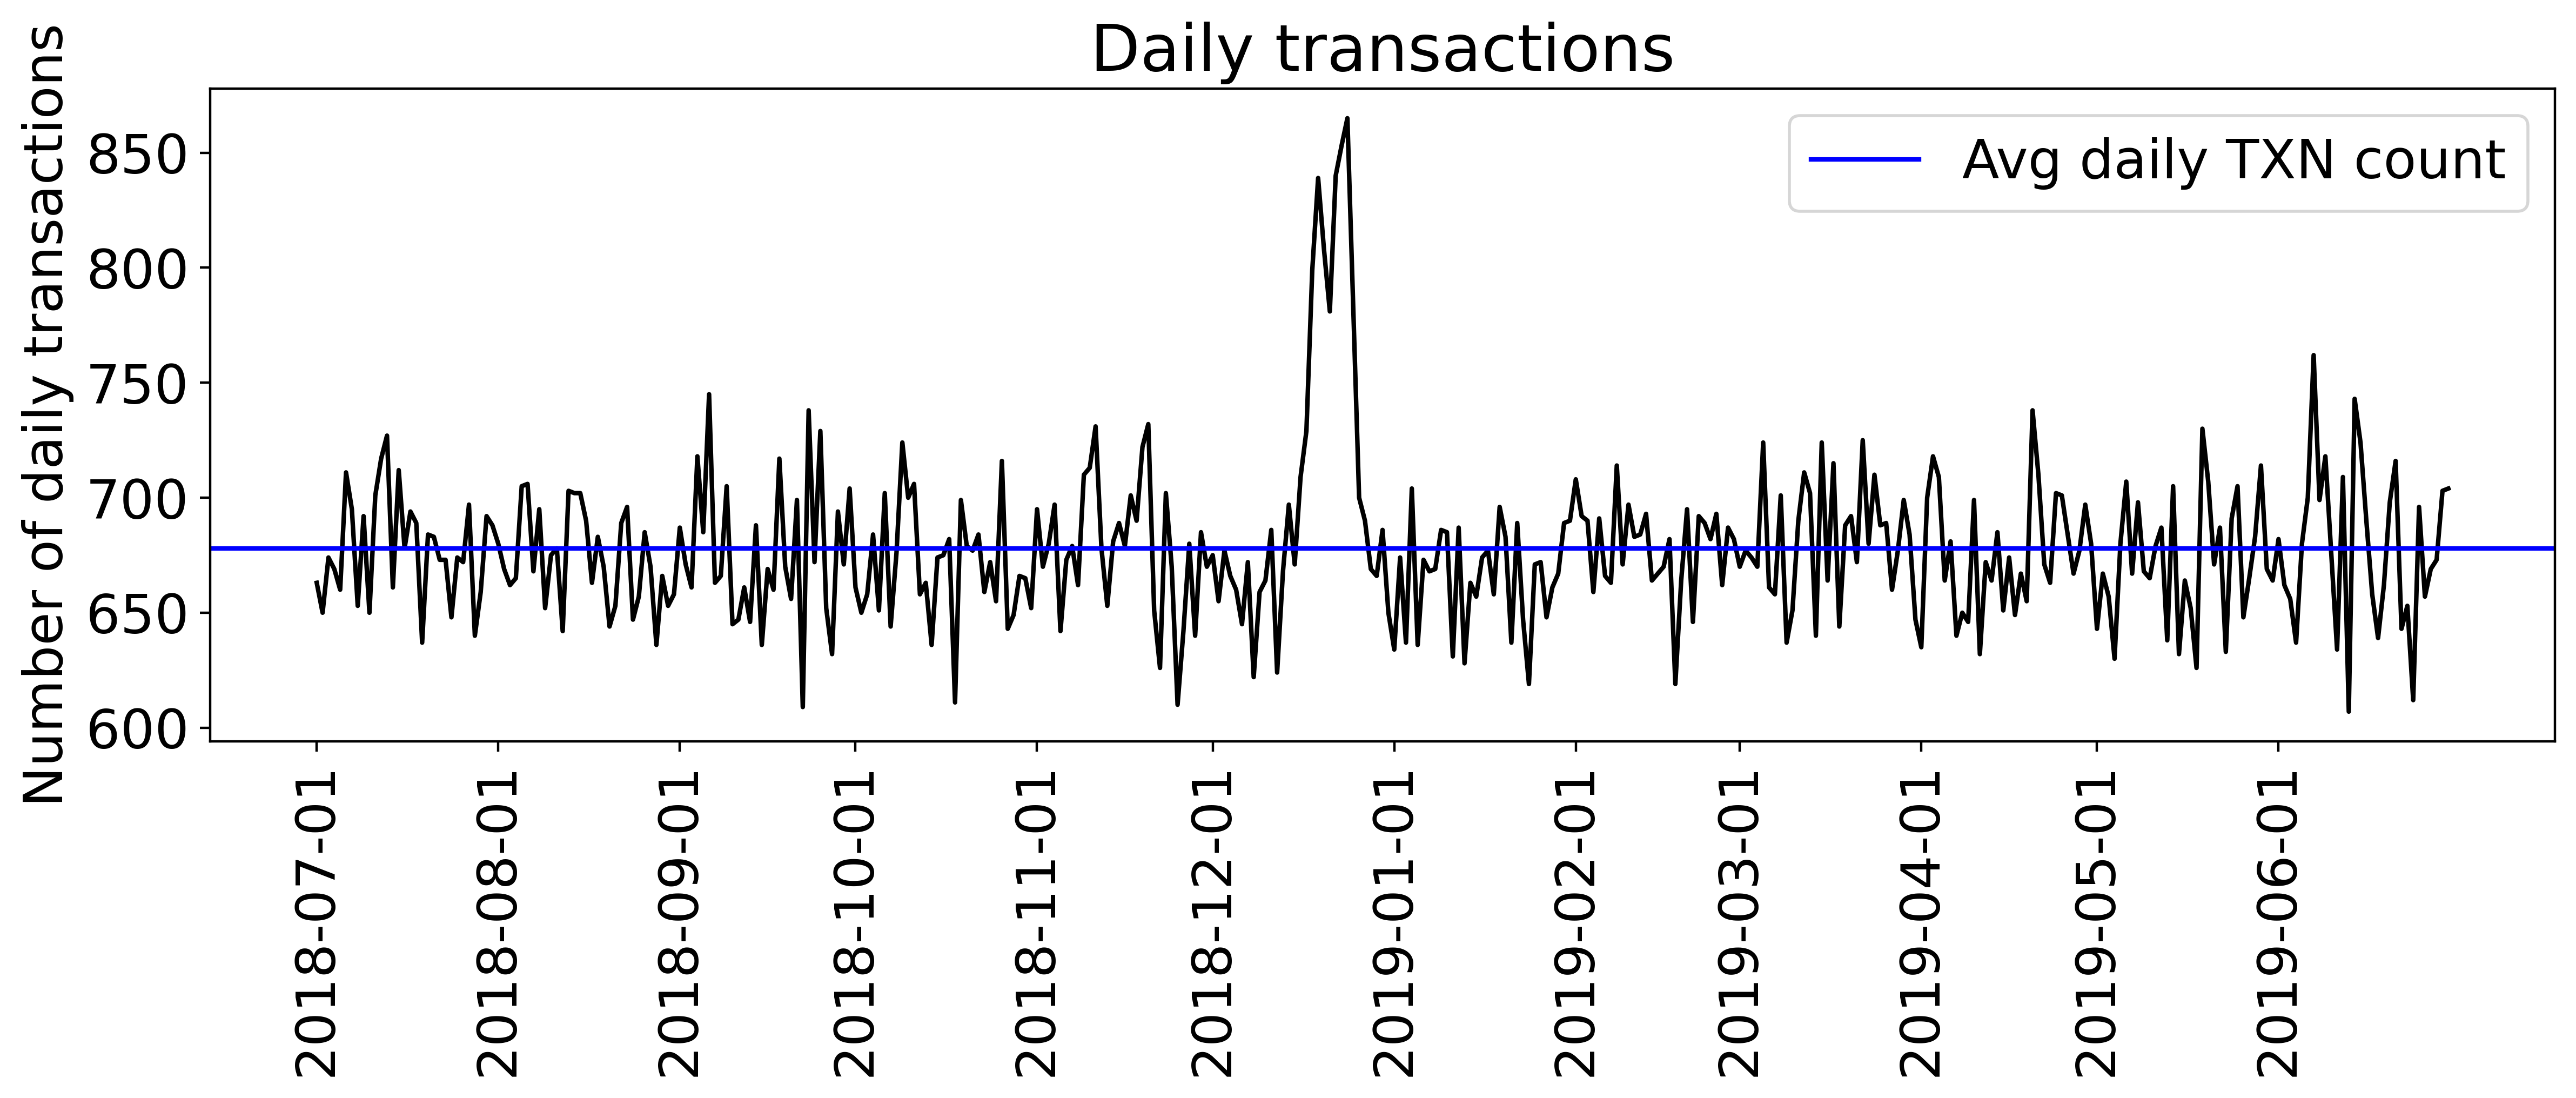

In [66]:
color = sb.color_palette()[0]

date_txn = df.groupby('DATE')['TXN_ID'].count()
date = df.groupby(pd.Grouper(key='DATE', freq='MS'))['TXN_ID'].count()
avg_daily = date_txn.values.mean()
print('The average daily number of transaction is {}'.format(avg_daily))

plt.rcParams['font.size'] = 18
plt.figure(figsize=(14,4), dpi = 400)
plt.plot(date_txn.index,date_txn.values,color = 'black');
plt.axhline(y= avg_daily, color = 'b', label = f'Avg daily TXN count');
plt.legend()
plt.xticks(rotation=90,ticks=date.index);
plt.ylabel('Number of daily transactions');
plt.title('Daily transactions');
plt.savefig('total_transaction',dpi=120,bbox_inches='tight')

Analysing daily transactions over time reveals that daily average transactions hover around $678 with little deviation throughout the year except in early December, where daily average transactions shoot up to a little above 859, before quickly returning to normal levels.

## __What is the weekly number of transaction over time?__

### __Analyse weekly transactions__

The mean weekly total transaction is 4655.452830188679
<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


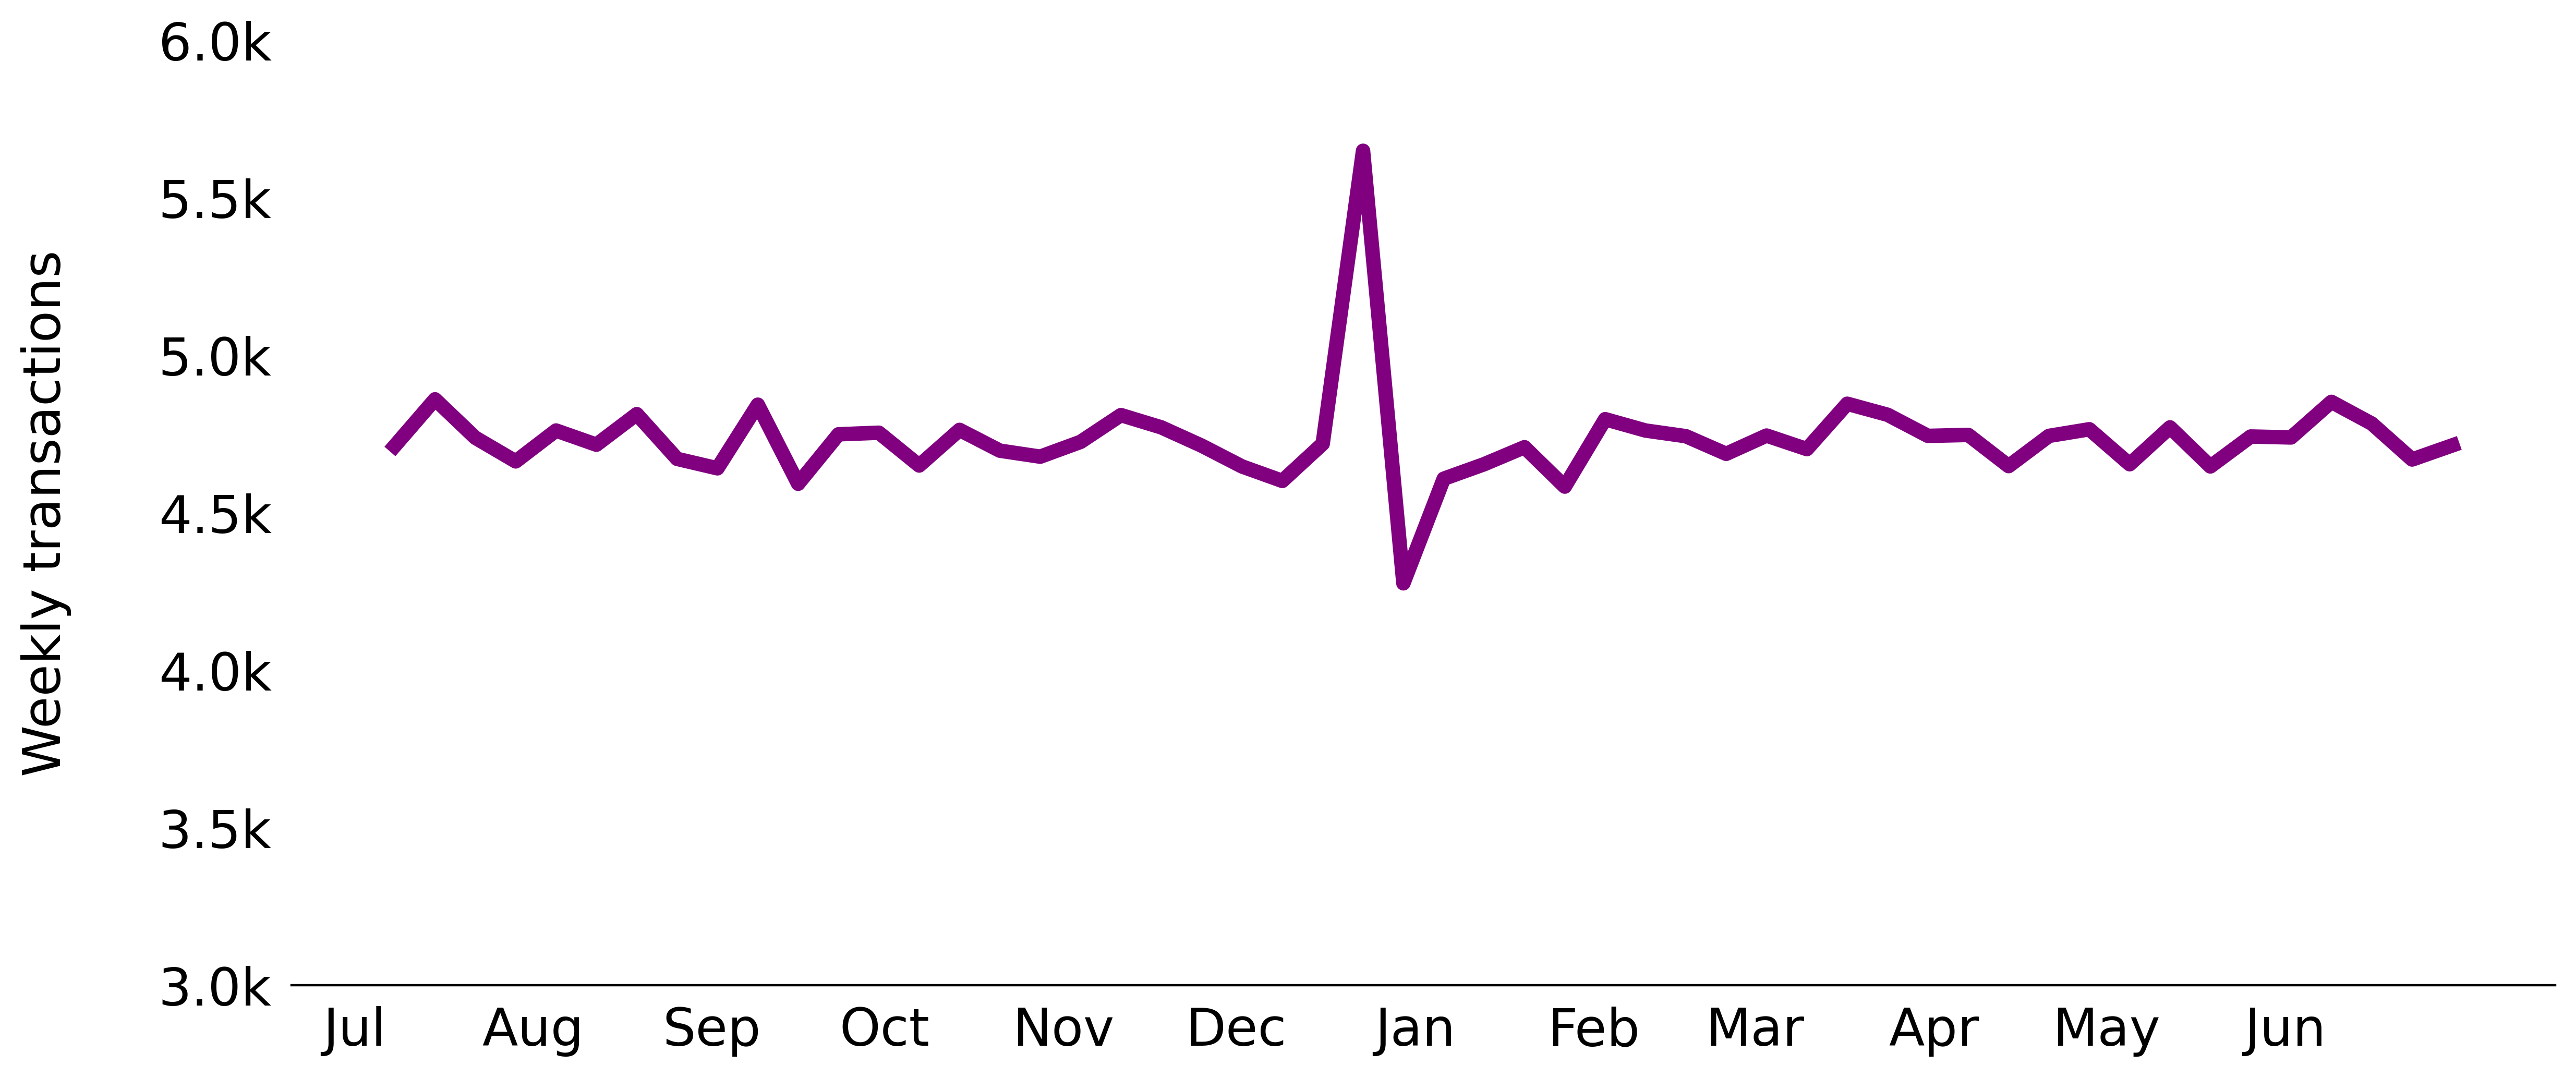

In [68]:
# group by weeks
date_TXN = df.groupby(pd.Grouper(key='DATE', freq='1W'))['TXN_ID'].count()
avg = date_TXN.values.mean()
print('The mean weekly total transaction is {}'.format(avg))

# group by months
date= df.groupby(pd.Grouper(key='DATE', freq='MS'))['TXN_ID'].count()
print(type(date.index))
xticks = date.index.strftime('%b')
yticks =['3.0k','3.5k','4.0k','4.5k','5.0k','5.5k','6.0k']

plt.figure(figsize=(14,6), dpi = 400)
plt.plot(date_TXN.index[1:],date_TXN.values[1:],color='purple', linewidth=5)
plt.ylabel('Weekly transactions',labelpad=30)

# Remove left, top and right border lines
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# remove x and y tick marks
plt.tick_params(axis='y', which='both', left=False)
plt.tick_params(axis='x', which='both', bottom=False)

# rename the xticks
plt.xticks(date.index, xticks)

# limit the ylimit
plt.ylim([3000,6000])

# rename yticks
plt.yticks(plt.yticks()[0],yticks);

# save the plot with white background
plt.savefig('weekly_transaction.png', dpi=120, bbox_inches='tight', facecolor='w') 

Also similar trend is recorded in weekly total transaction, which remains fairly stable around the mean of 4655 up until early December, which records a drastic increase in sales before crushing to below average in early January and finally recovering in February. This customer purchase behaviour is investigated further.

## __What is the daily transactions in December alone?__

### __Analyse daily transactions in December__

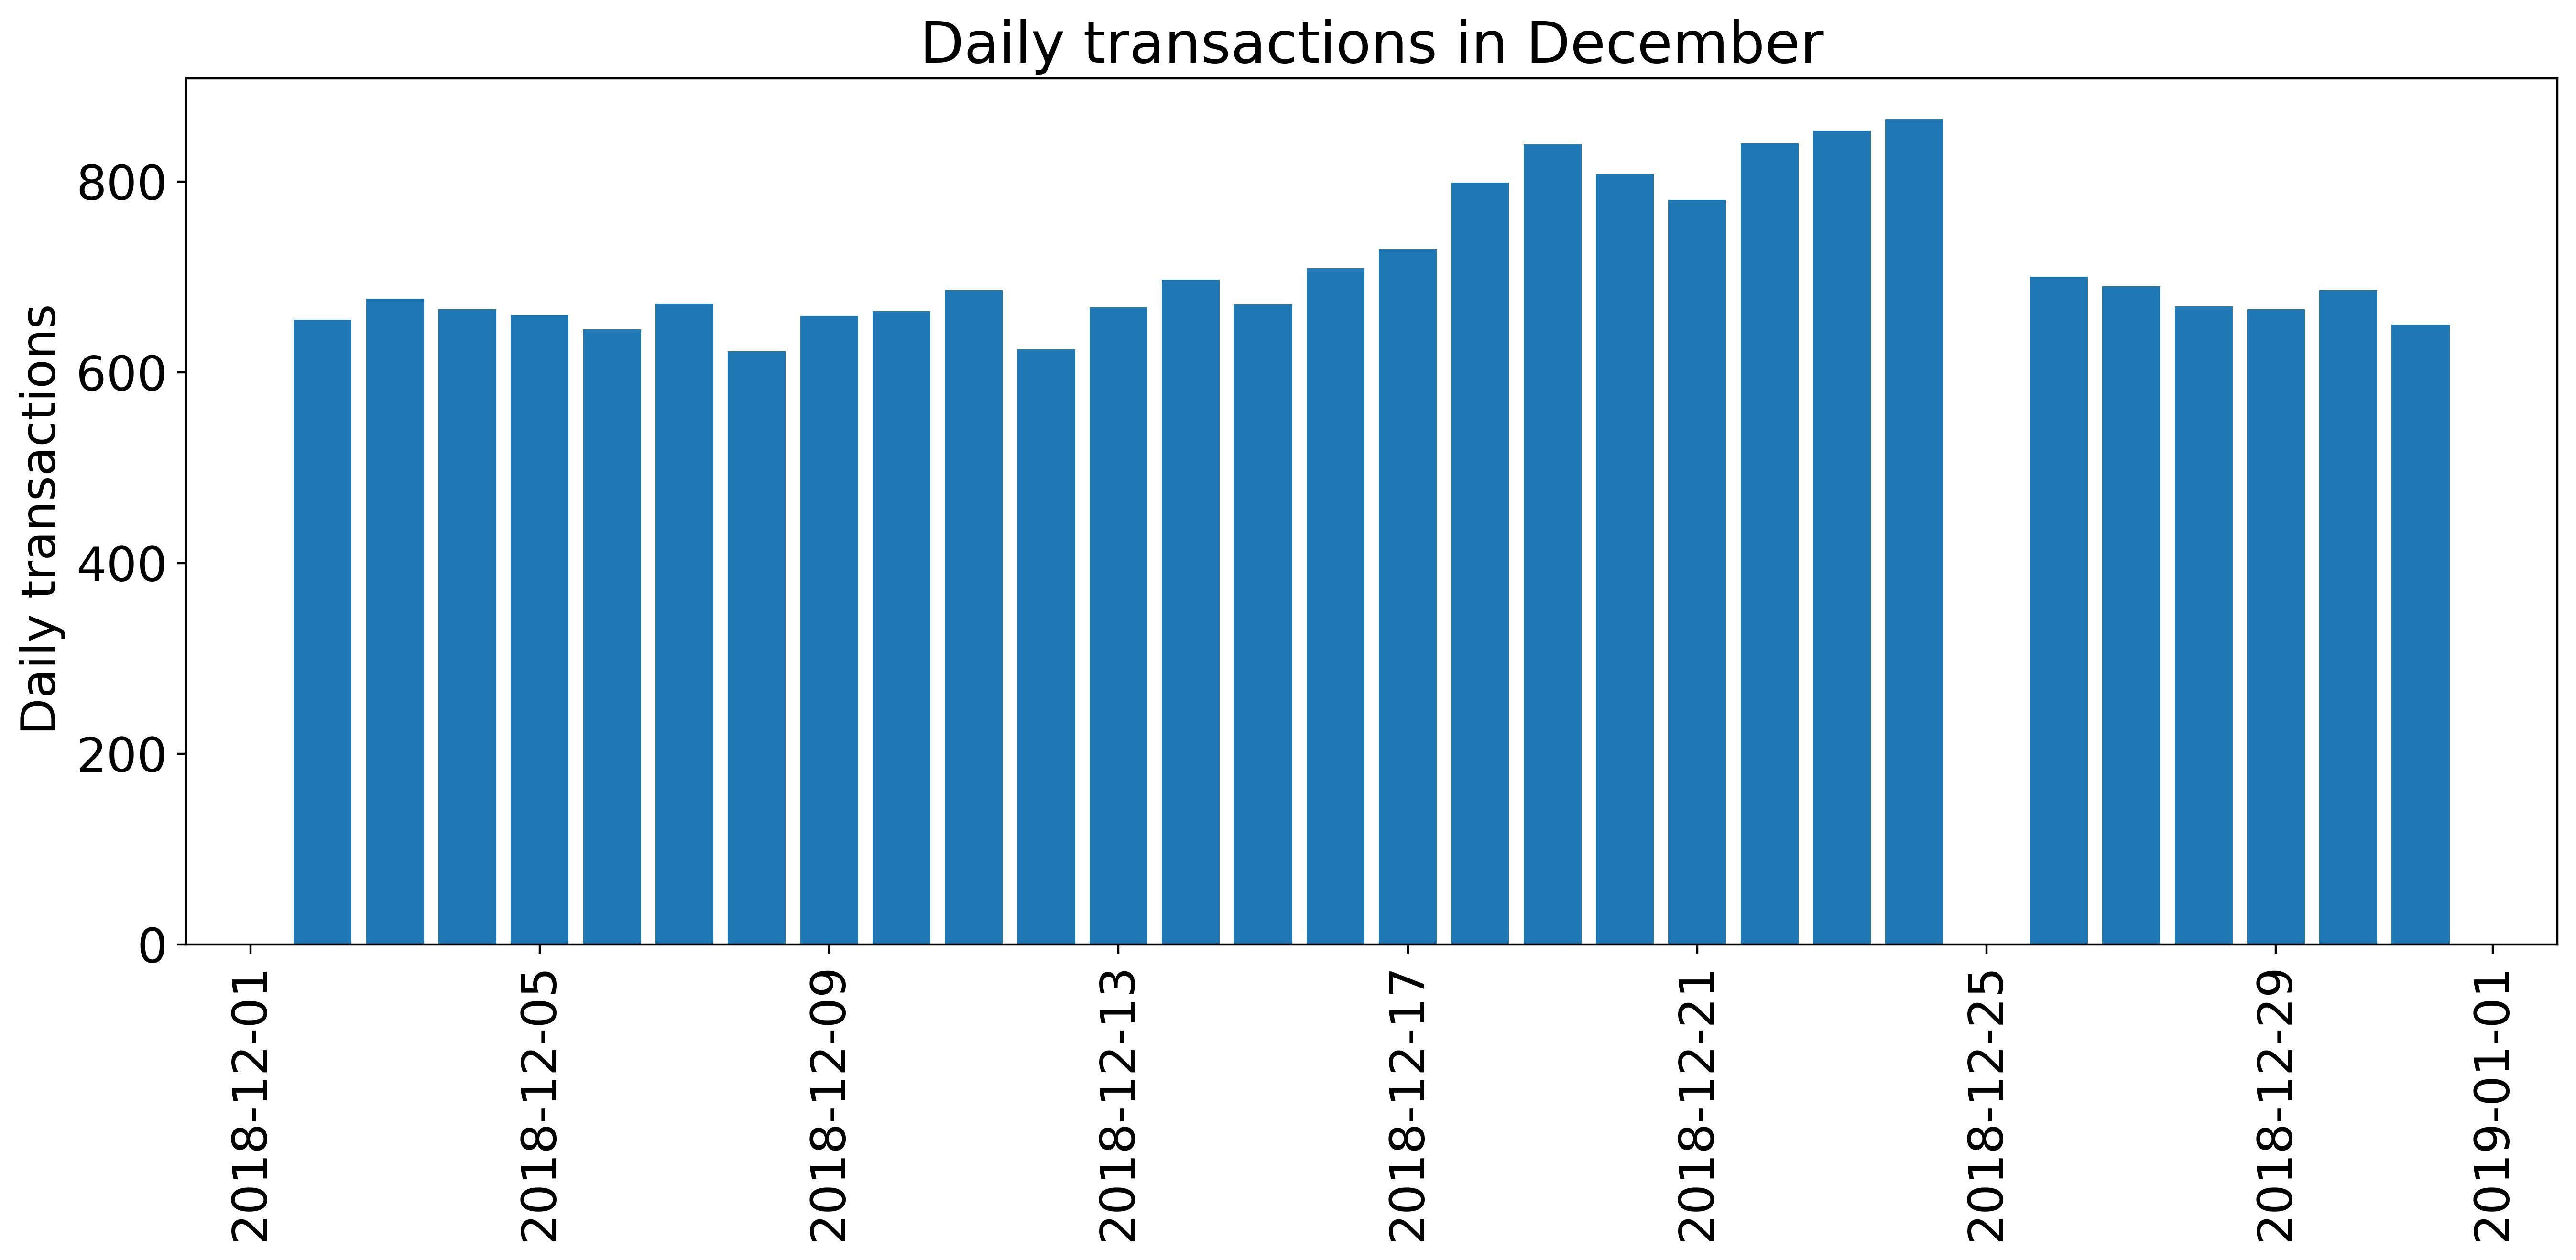

In [69]:
plt.figure(figsize=(16,6), dpi = 400)
christmas_TXN = df.query("DATE > '2018-12-01' & DATE < '2019-01-01'")
christmas_trend = christmas_TXN.groupby(pd.Grouper(key='DATE', freq='1D'))['TXN_ID'].count()
plt.bar(christmas_trend.index,christmas_trend.values,color=color);
plt.xticks(rotation=90);
plt.ylabel('Daily transactions ');
plt.title('Daily transactions in December');
plt.savefig('dailyy_transaction',dpi=120,bbox_inches='tight')

A further look into the trend confirms that daily transactions increase leading up to the __25th__ (Christmas day) before crashing to 0, as shops close for Christmas. They then reopen on the 26th and transactions recover steadily to average levels.

## __What is the most sold pack size?__ 

### __Analyse pack size__

In [34]:
pd.DataFrame(df.PACK_SIZE.describe())

PACK_SIZE 
 
 
 
 
 count 
 246739.000000 
 
 
 mean 
 175.583523 
 
 
 std 
 59.432239 
 
 
 min 
 70.000000 
 
 
 25% 
 150.000000 
 
 
 50% 
 170.000000 
 
 
 75% 
 175.000000 
 
 
 max 
 380.000000

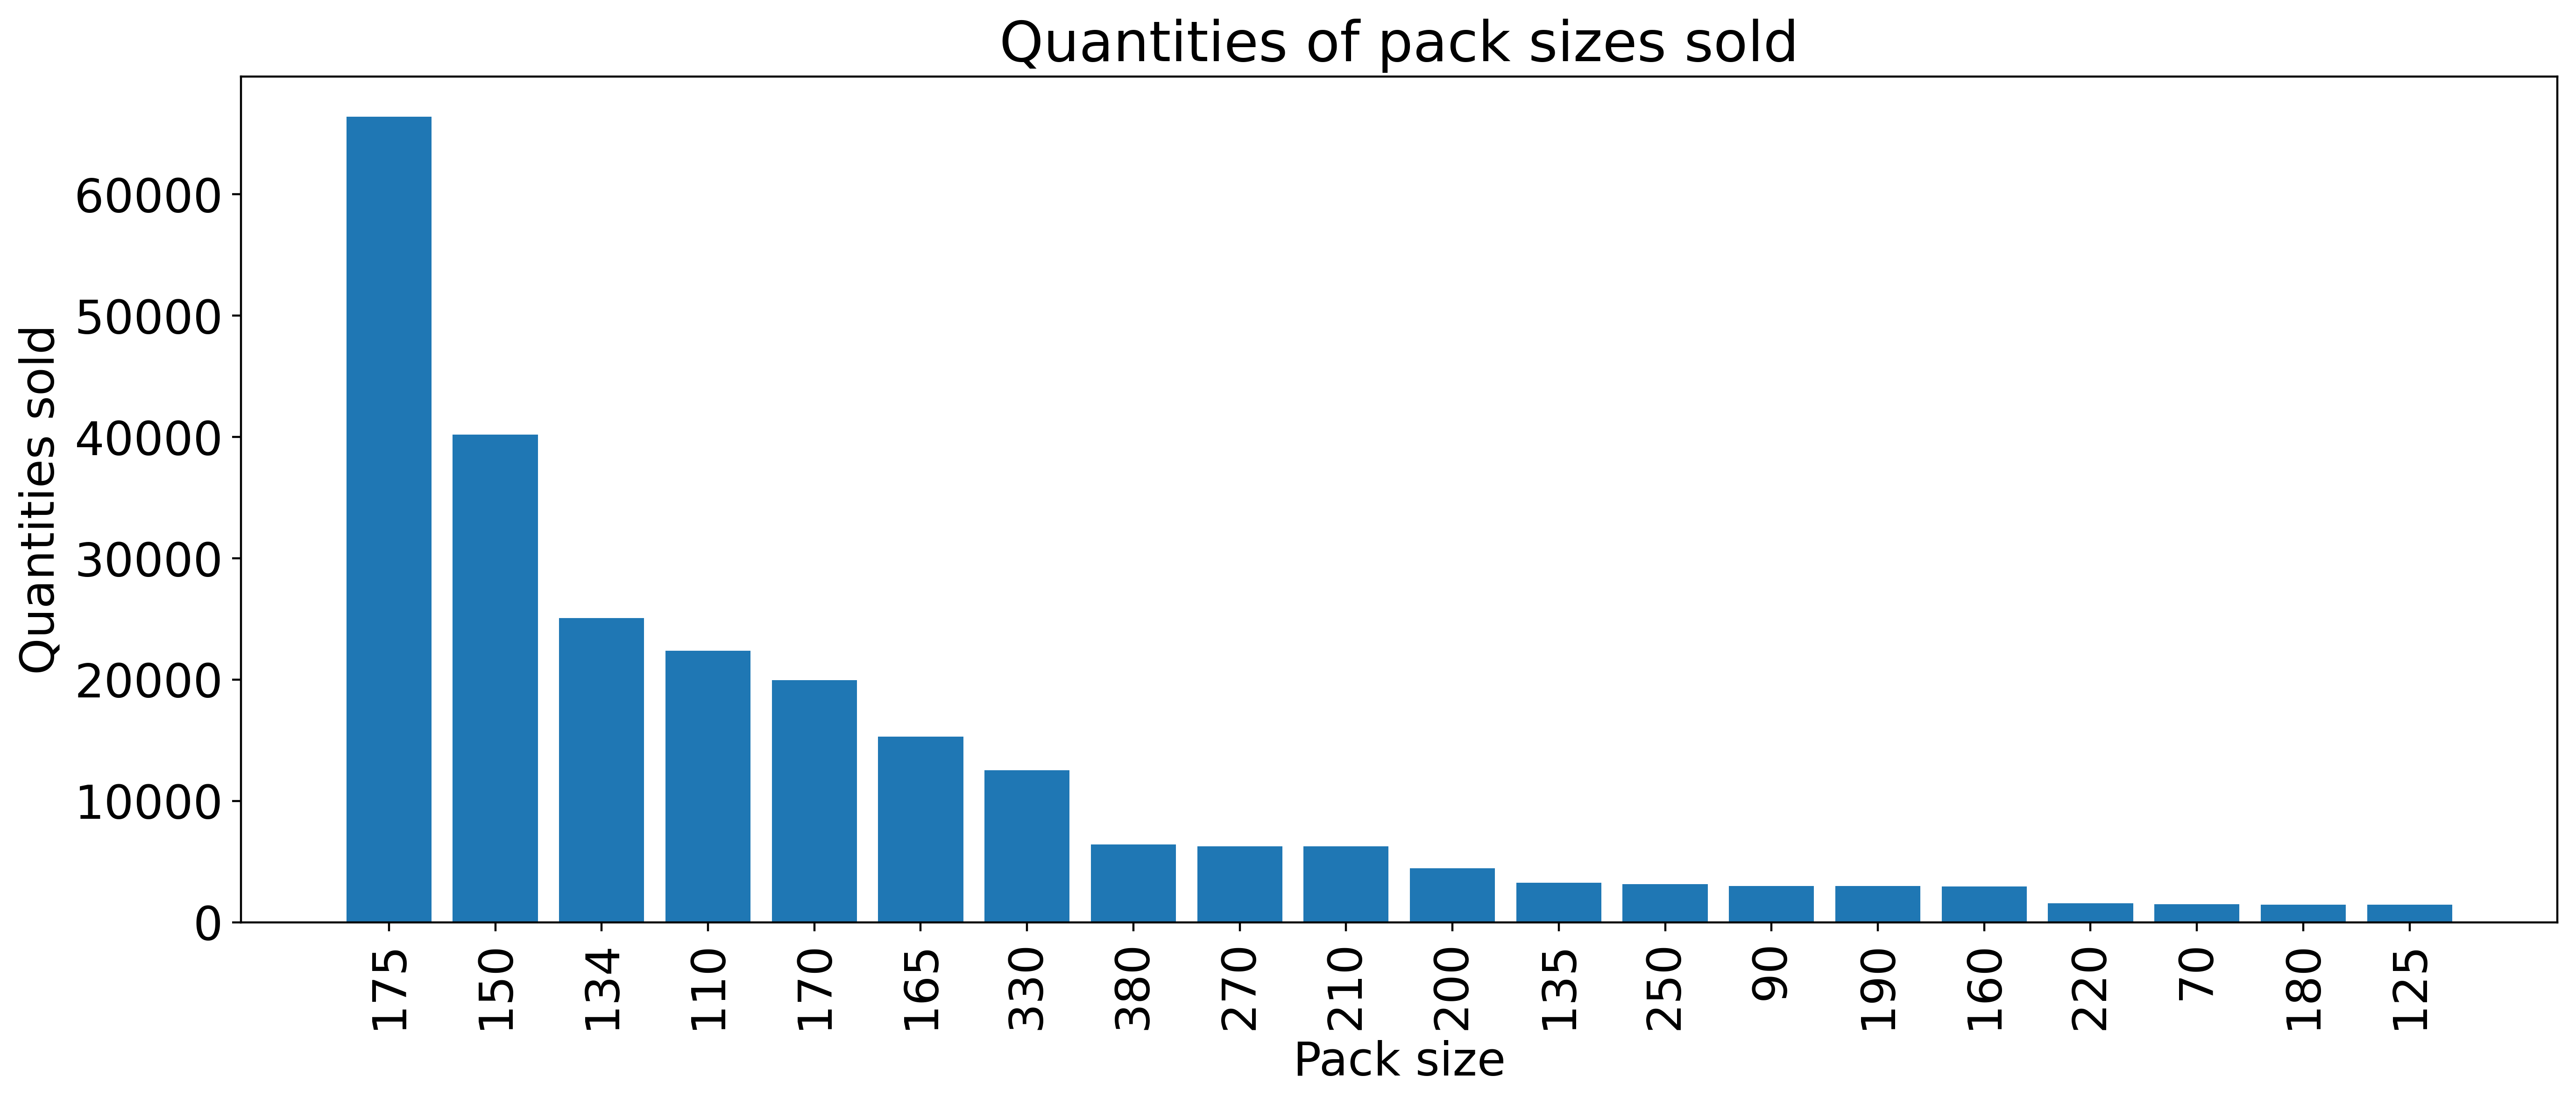

In [35]:
color = sb.color_palette()[0]
plt.figure(figsize=(16,6), dpi = 400)
pack_size = df.PACK_SIZE.value_counts()
# pack_size
plt.bar(pack_size.index.astype(str),pack_size.values);
plt.xticks(rotation=90);
plt.ylabel('Quantities sold');
plt.xlabel('Pack size');
plt.title('Quantities of pack sizes sold');

Out of all the pack sizes, the ost purchased among customers are size 175g, 150, 134, 110, 170and 165. With size 175g pack sizes being almost doubled that of size 150. Therefore, management should stock more of these sizes and less of size 200, 135, 250, 90, 190, 160,220, 70, 180, 125.

## __What are the customer's favourite brands ?__

### __Create brand column and consilidate similar brands together__

In [70]:
df['PROD_BRAND'] = pd.Series([x.split()[0] for x in df.PROD_NAME.values])

### __Combine RED and RRD brands as both are Red Rock Deli chips__

In [71]:
df['PROD_BRAND'] = df['PROD_BRAND'].str.replace('Red|RRD','RRD Red',regex=True)

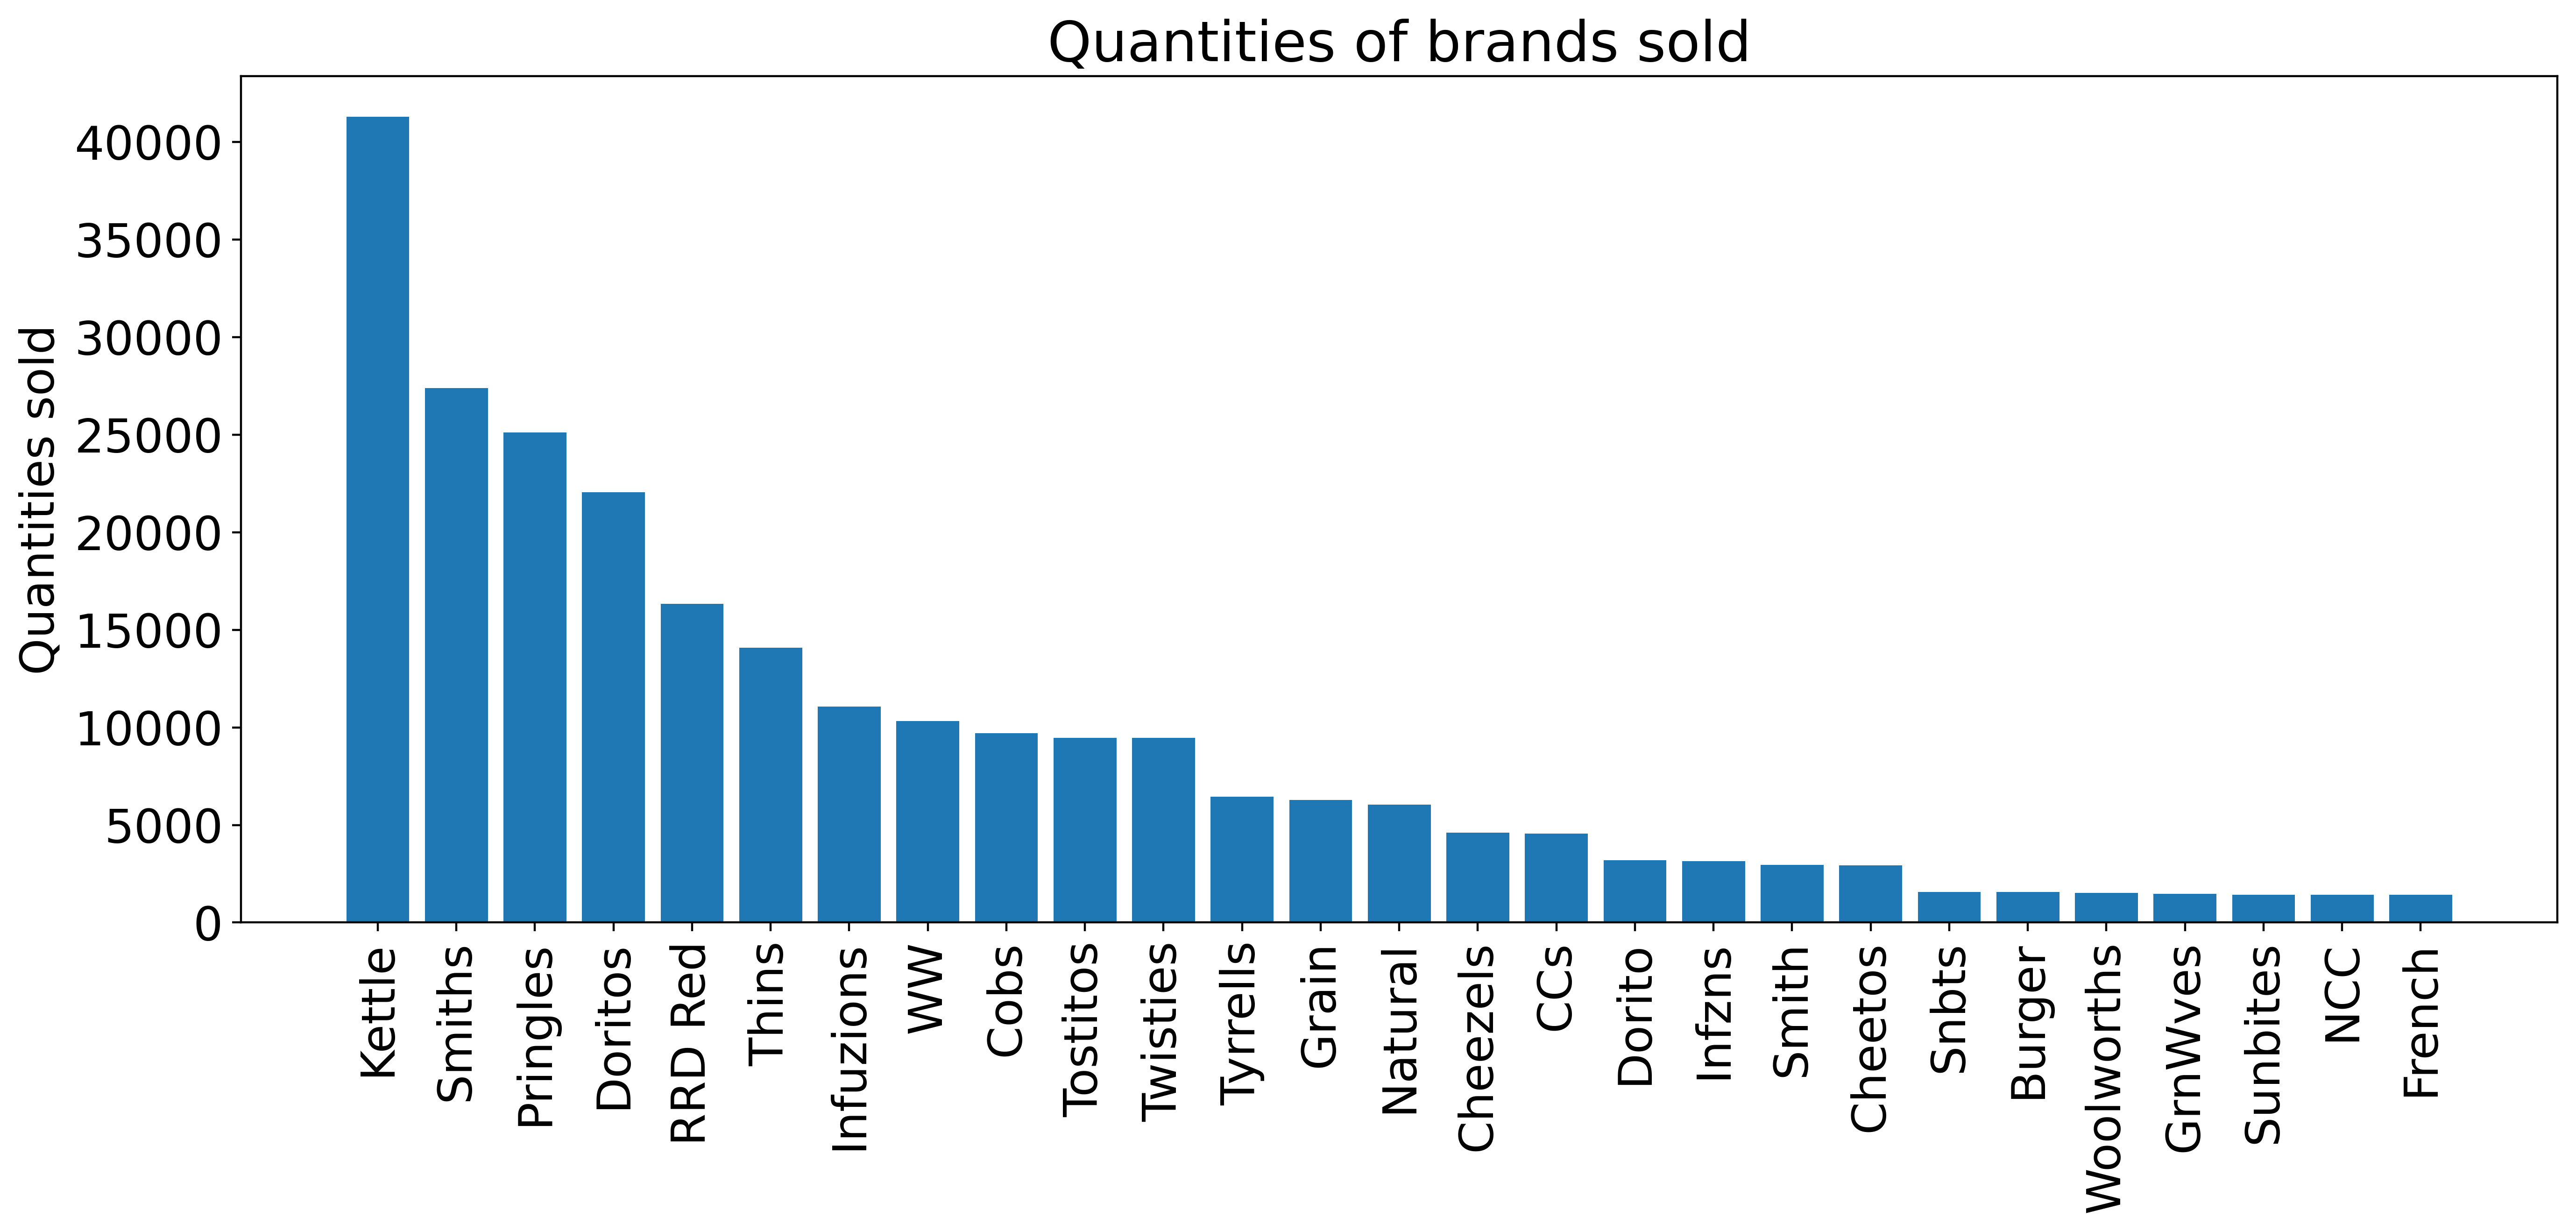

In [72]:
plt.figure(figsize=(16,6), dpi = 400)
brands = df['PROD_BRAND'].value_counts()
plt.bar(brands.index,brands.values);
plt.xticks(rotation=90);
plt.ylabel('Quantities sold');
plt.title('Quantities of brands sold');

Kettle, Smiths, Pringles and Doritos are the top 4 brands most preferred by the customers as evident in the large numbers sold. Therefore, a strategy would be to stock more of these and reduce stocking brands like French, NCC, Sunbites, GrnWves, Woolworths, burger and snbts.

## __Who spends the most on chips (total sales) ?__ 

### __Analyse total sales of customer by LIFESTAGE__

LIFESTAGE 
 TOT_SALES 
 
 
 
 
 0 
 OLDER SINGLES/COUPLES 
 376013.65 
 
 
 1 
 RETIREES 
 342381.90 
 
 
 2 
 OLDER FAMILIES 
 328519.90 
 
 
 3 
 YOUNG FAMILIES 
 294627.90 
 
 
 4 
 YOUNG SINGLES/COUPLES 
 243756.60 
 
 
 5 
 MIDAGE SINGLES/COUPLES 
 172523.80 
 
 
 6 
 NEW FAMILIES 
 47347.95

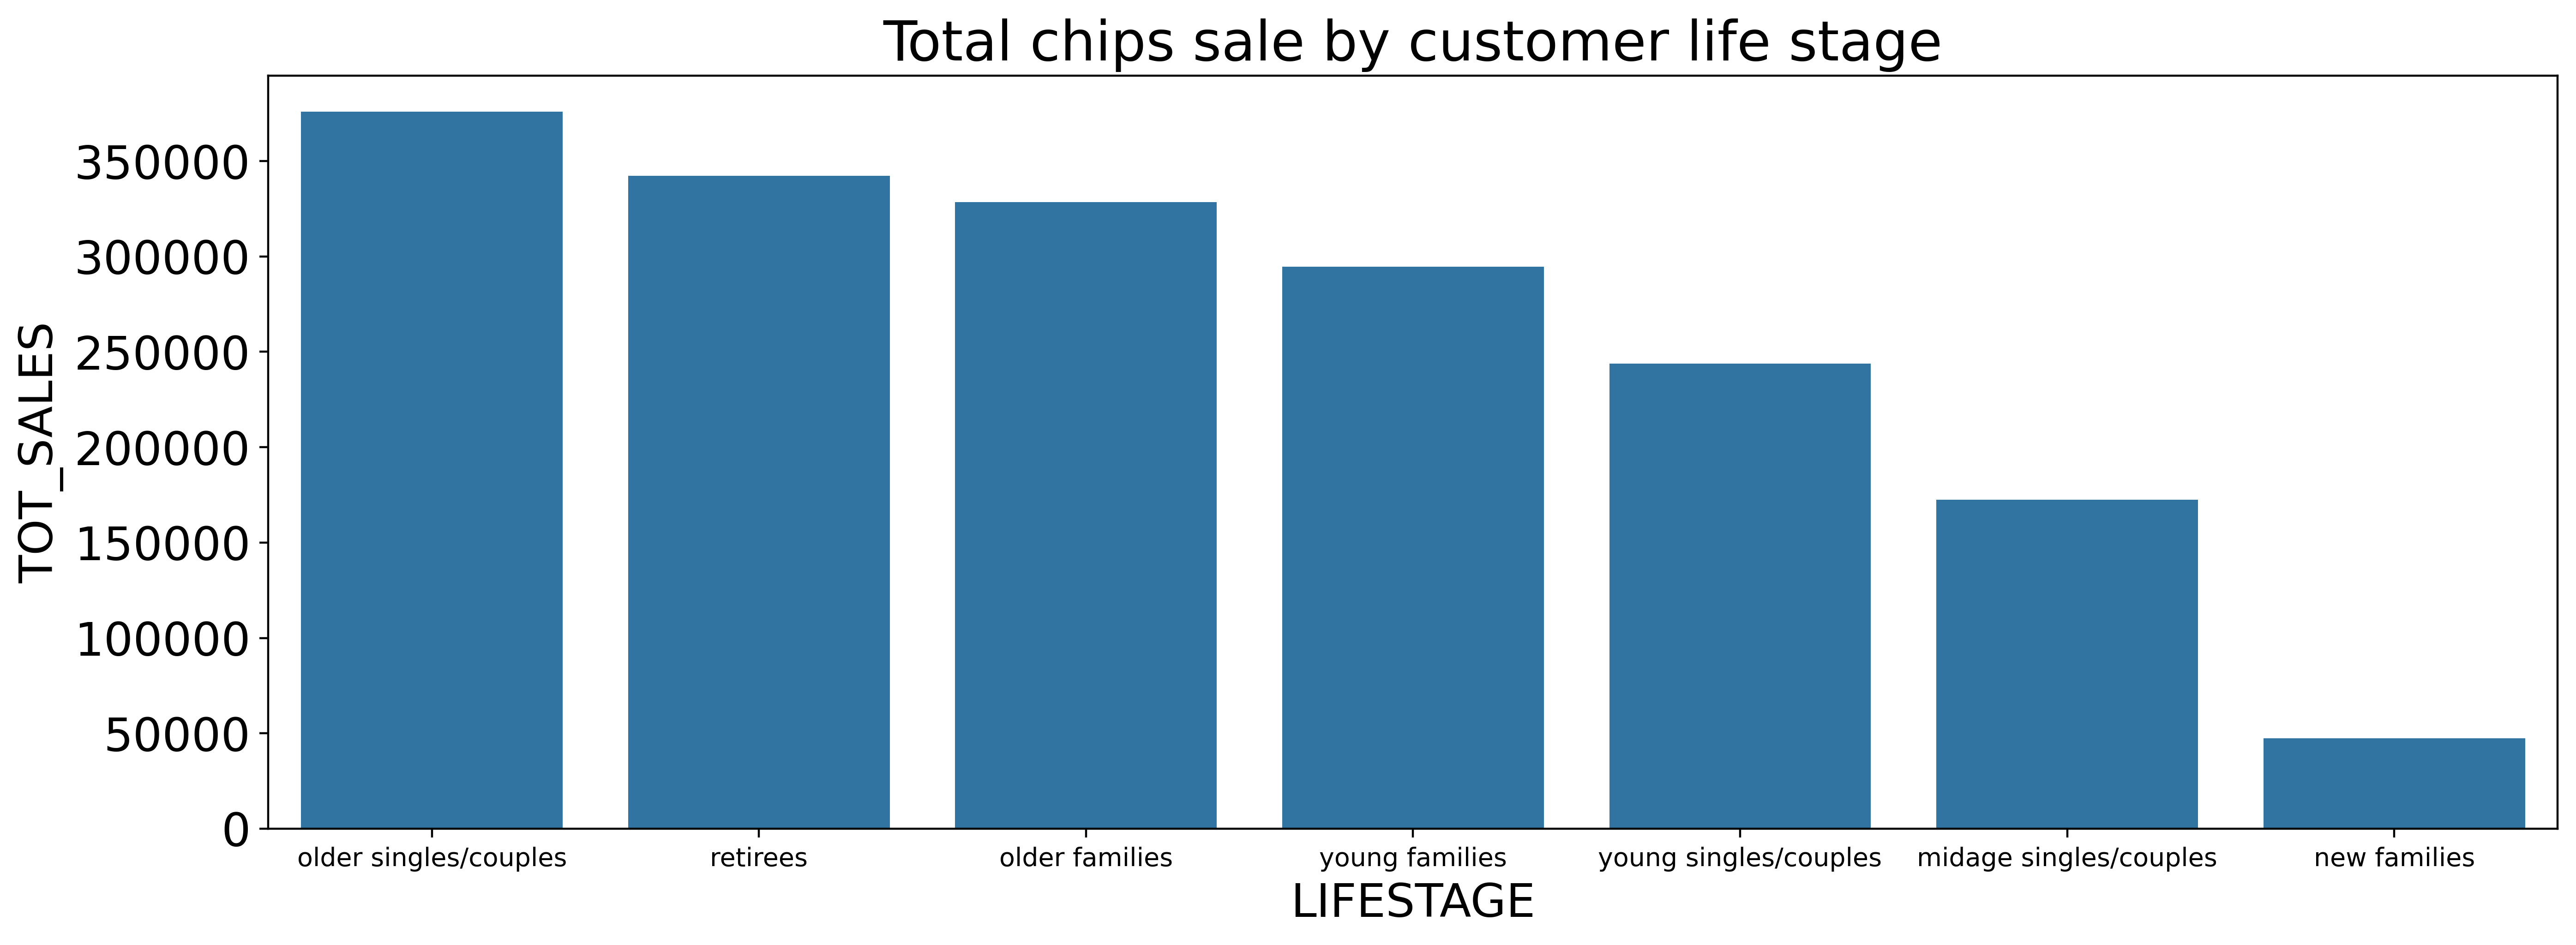

In [39]:
life_stage_spender = df.groupby(['LIFESTAGE'])['TOT_SALES'].sum().sort_values(ascending=False).reset_index()
display(life_stage_spender)

plt.figure(figsize=(16,6), dpi = 400)
ax=sb.barplot(x=life_stage_spender.LIFESTAGE,y=life_stage_spender.TOT_SALES,color=color)

# reduce fonts size and lower 
plt.xticks(fontsize=10)
ax.set_xticklabels([x.lower() for x in life_stage_spender.LIFESTAGE.unique()])

# adjust plot up
plt.subplots_adjust(bottom=0.2)

plt.title('Total chips sale by customer life stage');

## __What kind of chips are they spending on (total sales) ?__ 

### __Analyse total sales of customer by LIFESTAGE and PREMIUM_CUSTOMER__

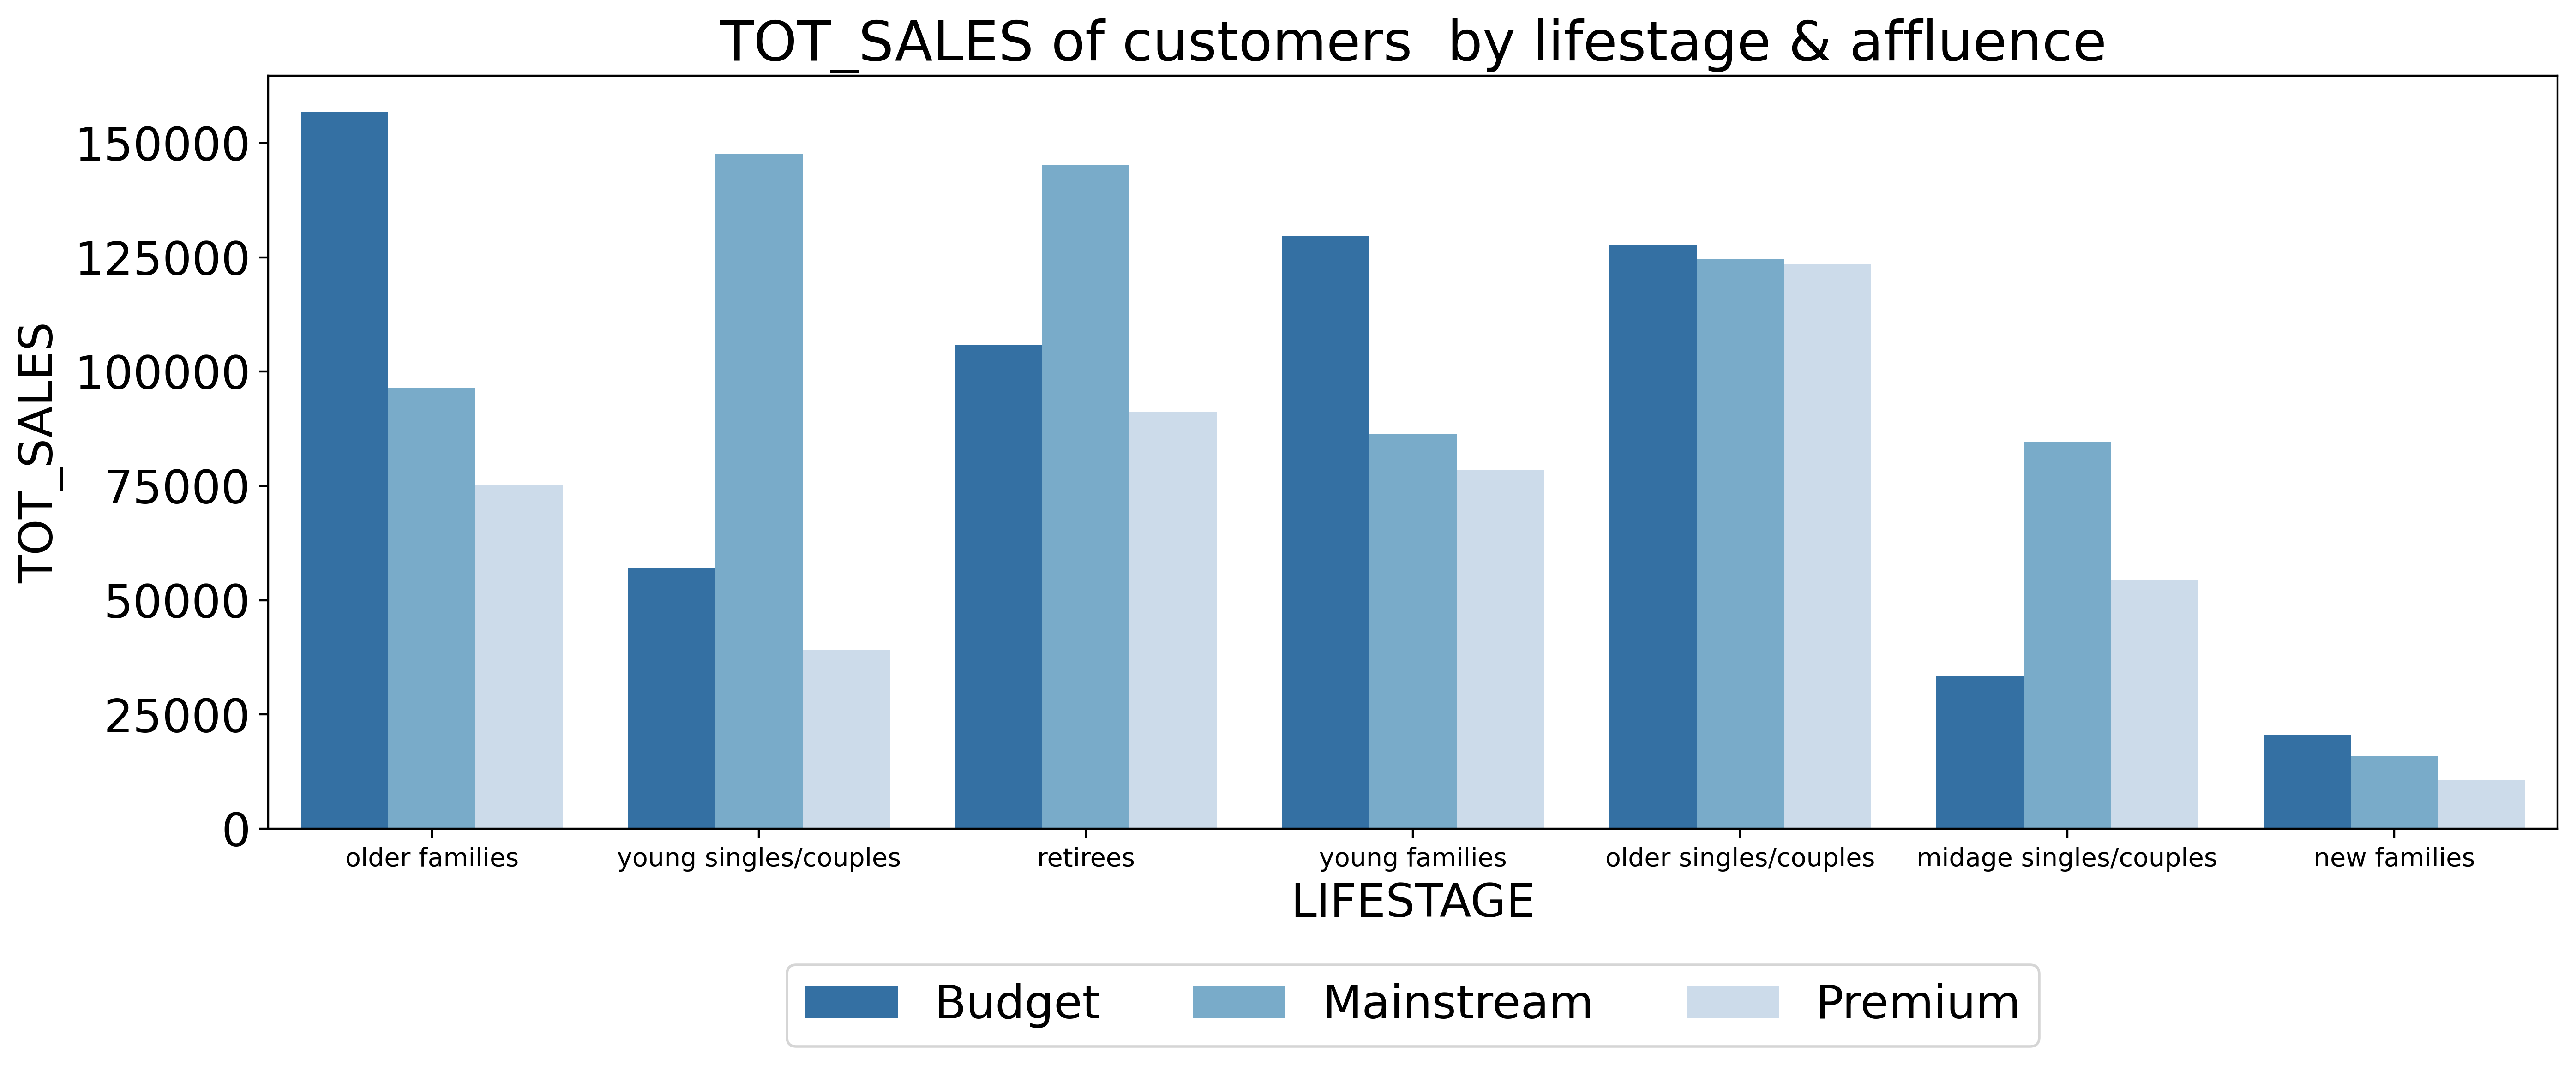

In [19]:
premium_status = df.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])['TOT_SALES']\
                .sum().sort_values(ascending=False).reset_index()
plt.figure(figsize=(16,6), dpi= 400);
ax = sb.barplot(x=premium_status.LIFESTAGE,y=premium_status.TOT_SALES,\
              hue=premium_status.PREMIUM_CUSTOMER,palette='Blues_r')

plt.legend(loc = 6, bbox_to_anchor = (1.0, 0.5)); 
plt.title('TOT_SALES of customers  by lifestage & affluence')

# reduce fonts size and lower 
plt.xticks(fontsize=10)
ax.set_xticklabels([x.lower() for x in premium_status.LIFESTAGE.unique()])

# adjust plot up
plt.subplots_adjust(bottom=0.2)
# place legend at bottom of plot
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)

# plt.savefig('tot_sales',dpi=120,bbox_inches='tight')

A further examination of purchase status, reveal that sales are coming mainly from Budget-older-families, Mainstream-young-singles/couples, Mainstream-retirees and Budget-young-families. Therefore these are the primary clients.

### __Analyse quantities of chips purchase by customer by life stage and purchase class__

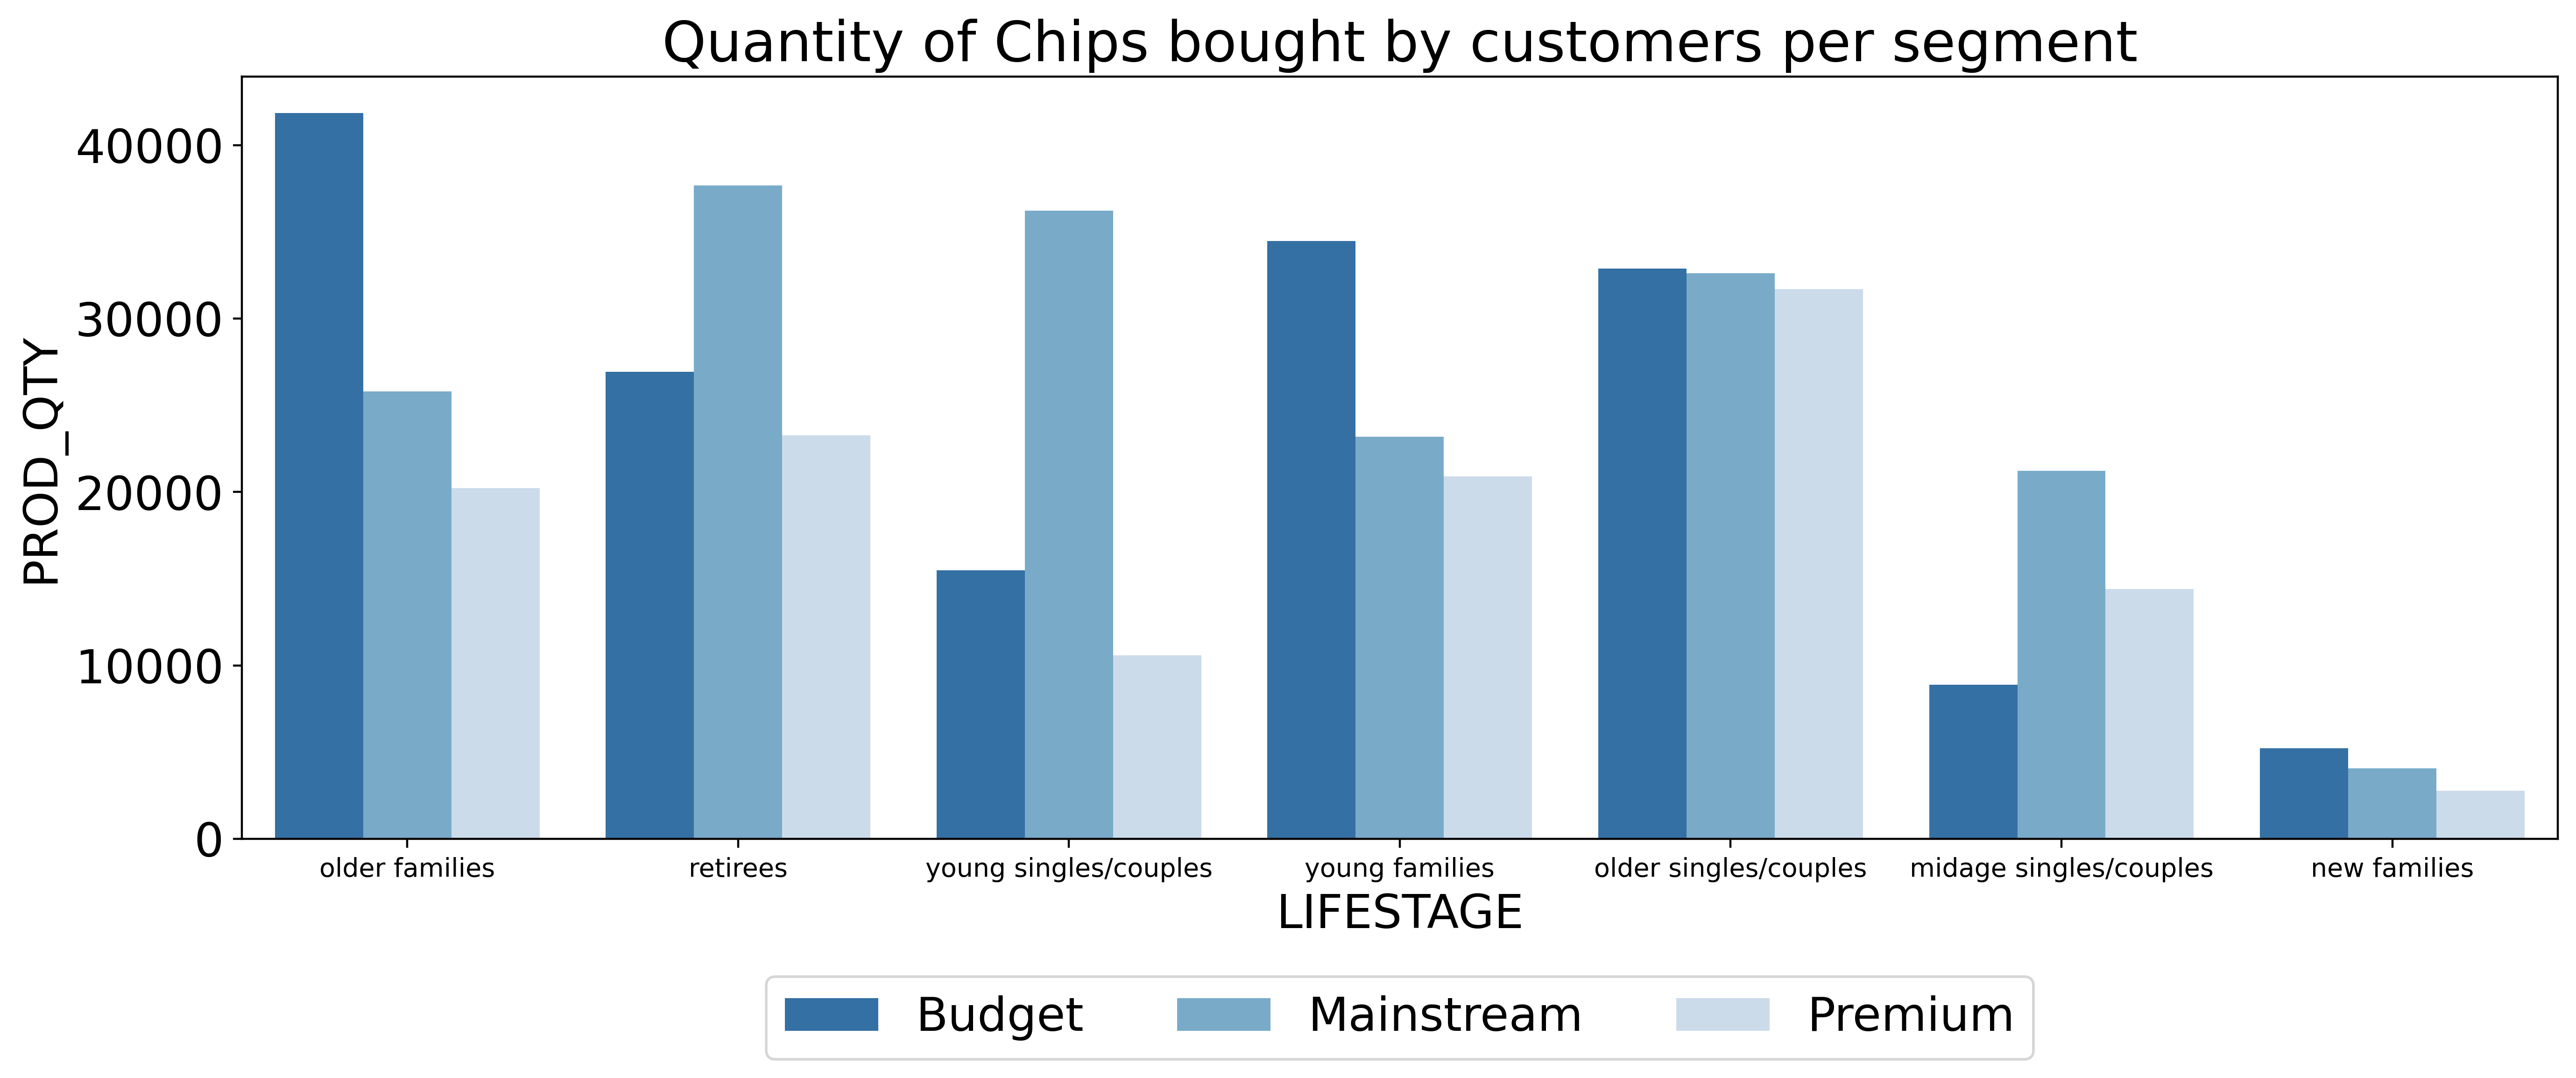

In [63]:
premium_status_qty = df.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])['PROD_QTY']\
                .sum().sort_values(ascending=False).reset_index()
plt.figure(figsize=(16,6), dpi= 400)
ax = sb.barplot(x=premium_status_qty.LIFESTAGE,y=premium_status_qty.PROD_QTY,\
              hue=premium_status_qty.PREMIUM_CUSTOMER,palette='Blues_r')
# plt.xticks(rotation=75)
plt.legend(loc = 6, bbox_to_anchor = (1.0, 0.5)); 
plt.title('Quantity of Chips bought by customers per segment')

# reduce fonts size and lower 
plt.xticks(fontsize=10)
ax.set_xticklabels([x.lower() for x in premium_status_qty.LIFESTAGE.unique()])

# adjust plot up
plt.subplots_adjust(bottom=0.2)
# place legend at bottom of plot
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3);

# plt.savefig('quantity_of_chips',dpi=120,bbox_inches='tight')

Consequently,the product quantity purchased closely mirrows the trend of total sales, further validating the findings.

## __How many customer by segment ?__

### __Analyse number of customers in each segment__

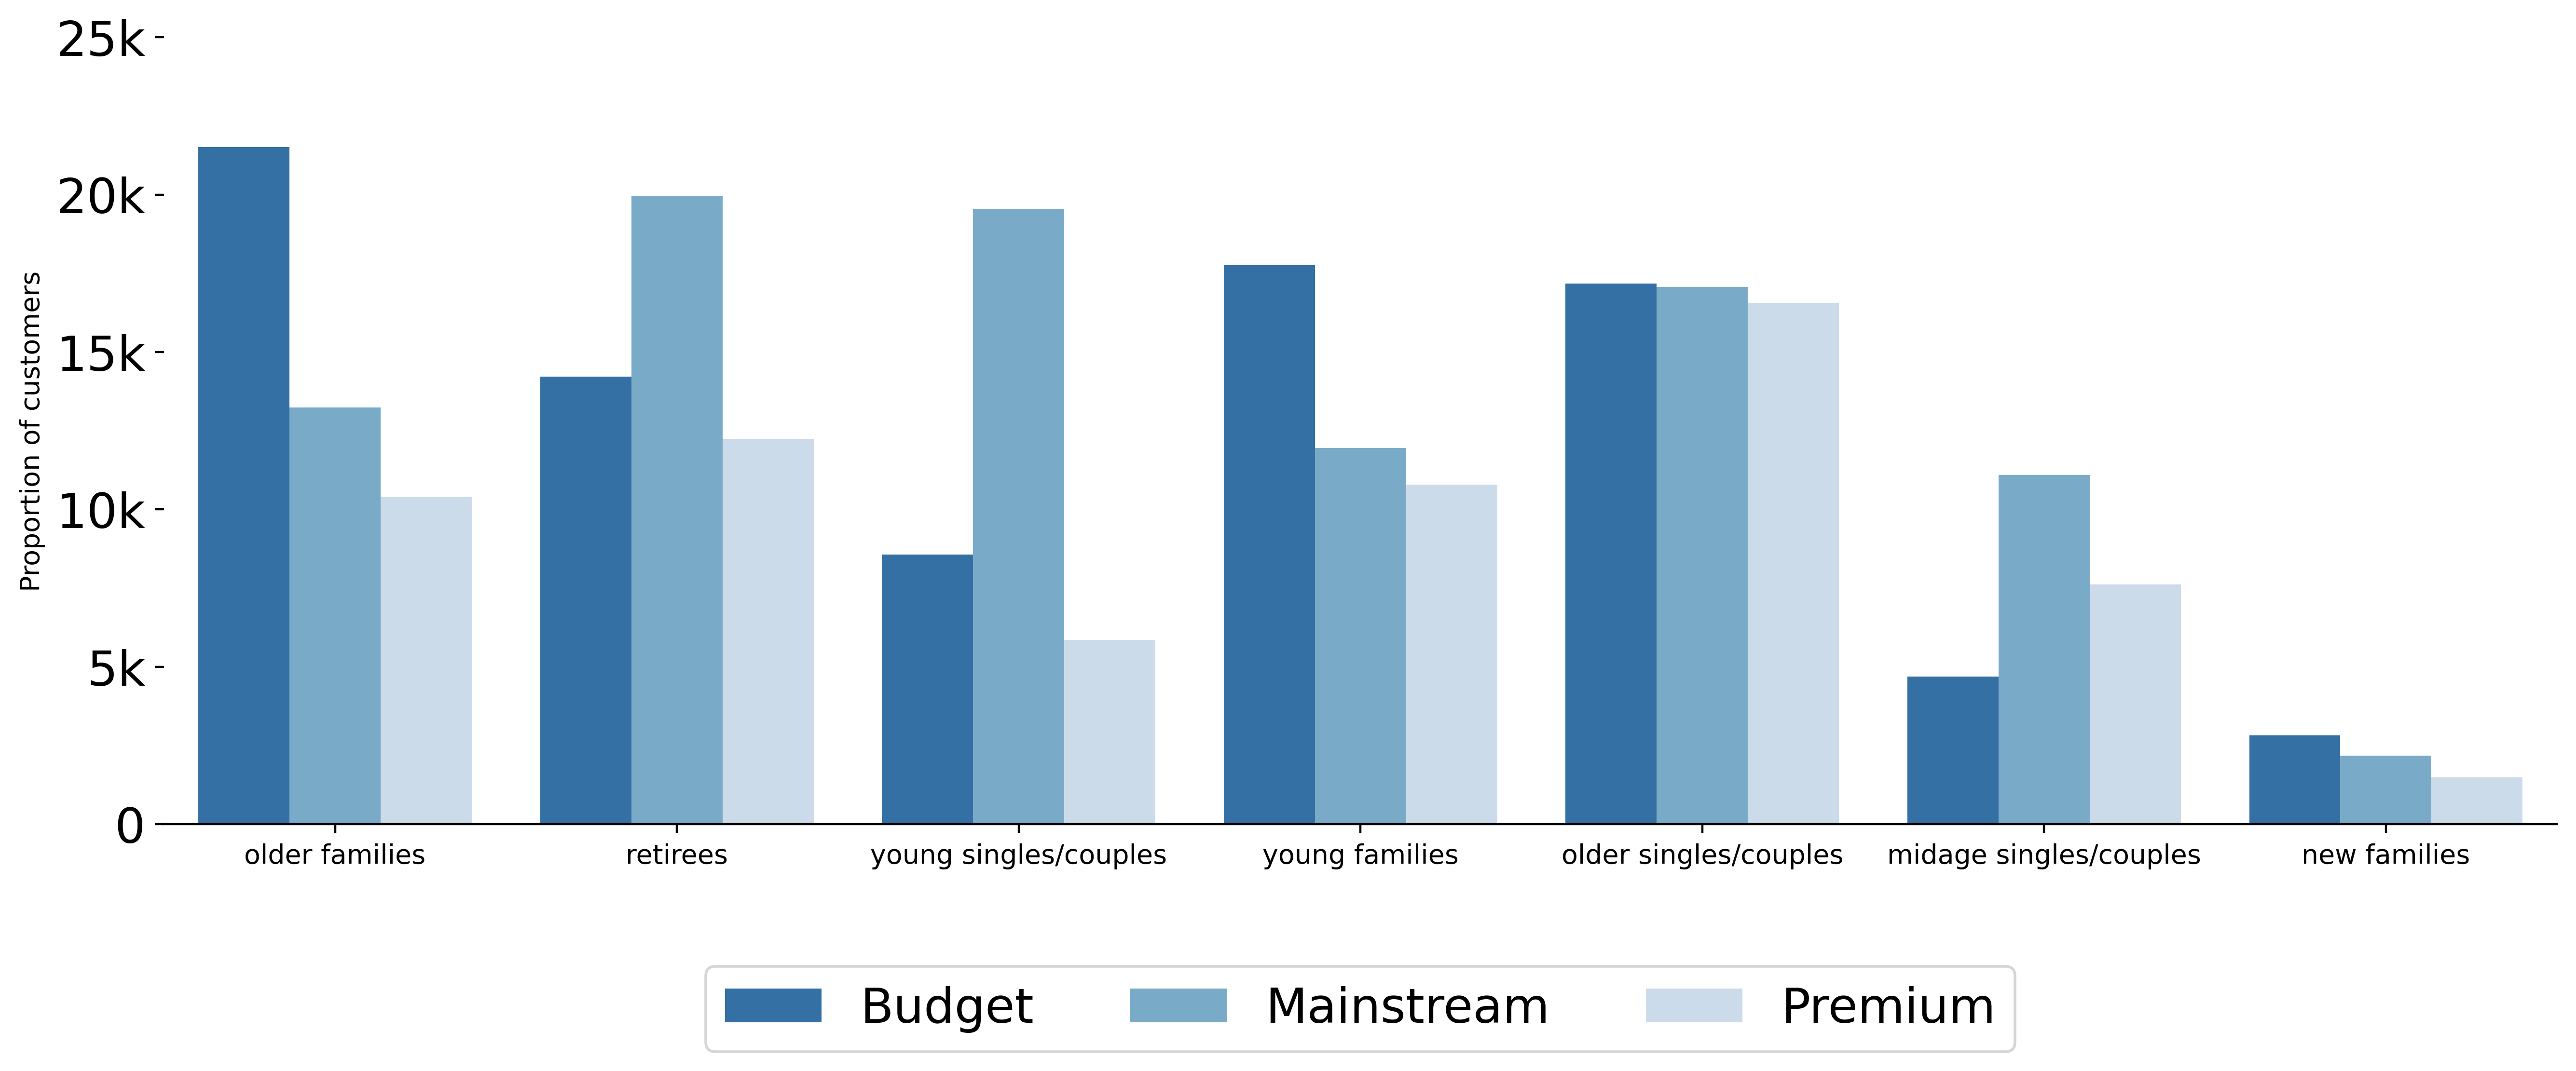

In [62]:
customers = df.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])['LYLTY_CARD_NBR']\
                .count().sort_values(ascending=False).reset_index()

plt.figure(figsize=(16,6), dpi= 400)
ax = sb.barplot(x=customers.LIFESTAGE,y=customers.LYLTY_CARD_NBR,
                     hue=customers.PREMIUM_CUSTOMER,palette='Blues_r')

# reduce fonts size and lower 
plt.xticks(fontsize=10)
ax.set_xticklabels([x.lower() for x in customers.LIFESTAGE.unique()])

# adjust plot up
plt.subplots_adjust(bottom=0.2)
# place legend at bottom of plot
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)

# set x and y labels
ax.set_xlabel('')
ax.set_ylabel('Proportion of customers',fontsize=10)

# remove spines 
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

yticks = ['0','5k','10k','15k','20k','25k'];
plt.yticks(plt.yticks()[0],yticks);

# plt.savefig('customers_per_segment', dpi=300, bbox_inches="tight", facecolor='w')

There are more Budget-older-families, Mainstream-retirees and Mainstream-young-singles/couples who buy chips. This reflects the total product quantities purchased and ultimately also reflects the total sales.
Higher sales may also be driven by more units of chips being bought per customer. This is looked at next.

## __What is the average number of chips bought per customer by segment?__

### __Analyse average number of chips bought per customer by segment__

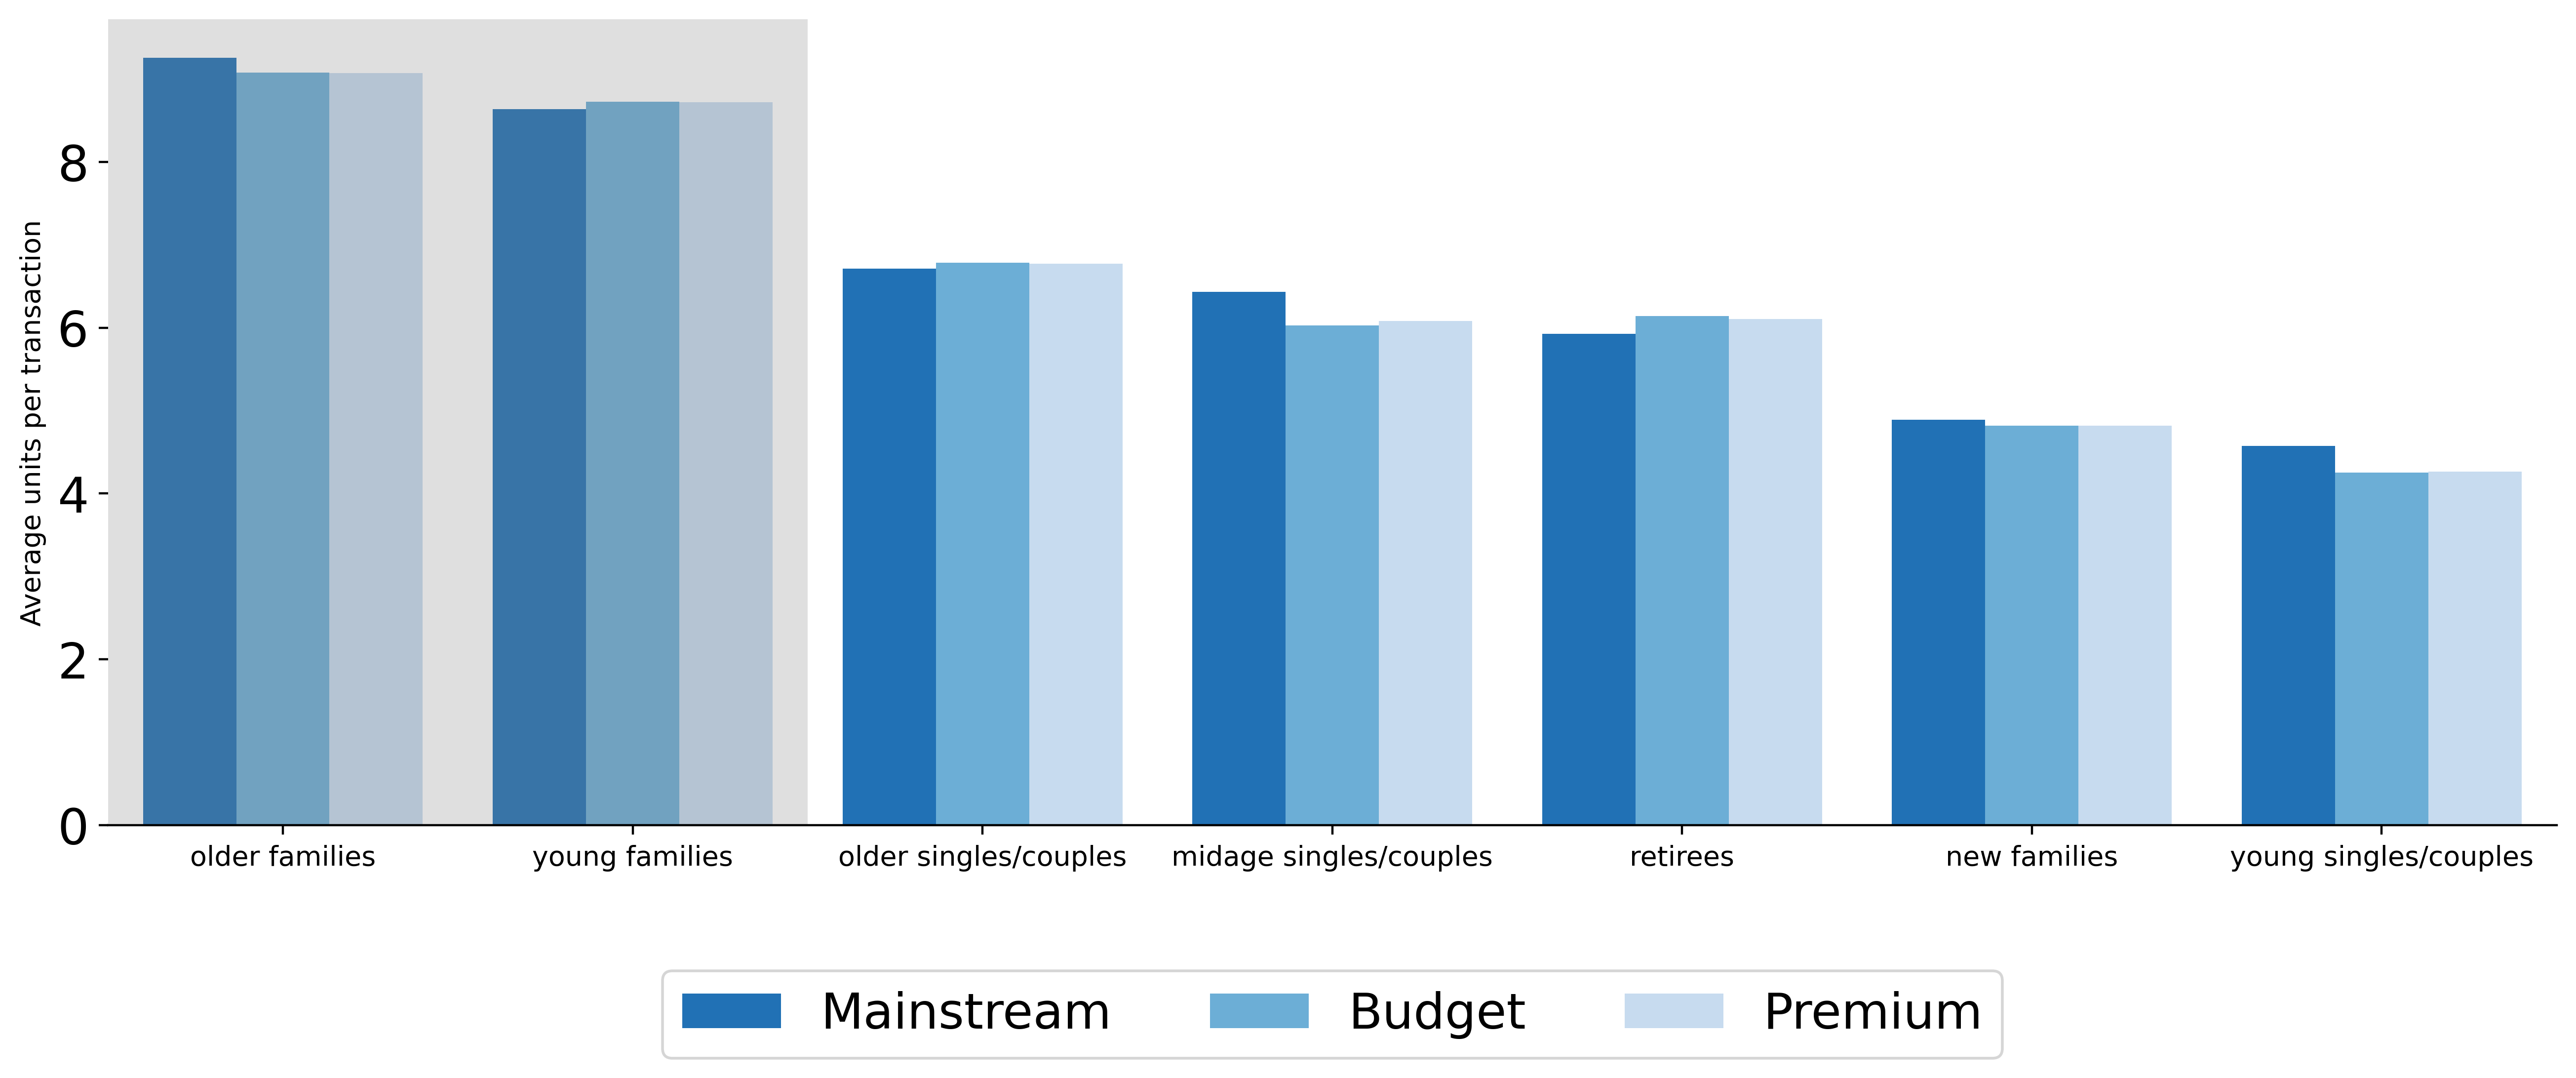

In [42]:
premium_status_qty = (df.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])['PROD_QTY'].sum()/
                      df.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])['LYLTY_CARD_NBR'].nunique())\
                        .sort_values(ascending=False).reset_index().rename(columns={0:'AVG'})

plt.figure(figsize=(16,6), dpi= 400)
ax = sb.barplot(x='LIFESTAGE', y= 'AVG', data = premium_status_qty, hue='PREMIUM_CUSTOMER',\
           palette='Blues_r', saturation=1)


plt.xticks(fontsize=10)
# access axis object and change xlabels
ax.set_xticklabels([x.lower() for x in premium_status_qty.LIFESTAGE.unique()])

# adjust plot up
plt.subplots_adjust(bottom=0.2)

# place legend at bottom of plot
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)

# Hide x and y labels
ax.set_xlabel('')
ax.set_ylabel('Average units per transaction',fontsize=10)

# Remove left, top and right border lines
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

from matplotlib.patches import Rectangle

# Add a grey rectangle to highlight the first two bars
rect = Rectangle((-1, 0), 2.5, max(p.get_height() for p in ax.patches)+2, facecolor='grey', alpha=0.25)
ax.add_patch(rect)

# save the plot with white background
plt.savefig('avg_chips_per_transaction.png', dpi=120, bbox_inches='tight', facecolor='w') 

Although there are more Mainstream-young-singles/couples and Mainstream-retirees who buy chips and making up the 2nd and 3rd most sales, they buy lesser units per customer than the other segments and therefore are leaving a lot on the table in unrealized sales. Thus, there is more potential to increase sales from this segment. In effect, a good strategy to increase the number of units sold to these customer segments could sharply increase sales. If achieved, they can reach sales similar to the older-budget families who make up the most sales by buying more units per customer.

## __What is the average price per unit by LIFESTAGE and PREMIUM_CUSTOMER ?__

### __Analyse average price per unit by LIFESTAGE and PREMIUM_CUSTOMER__

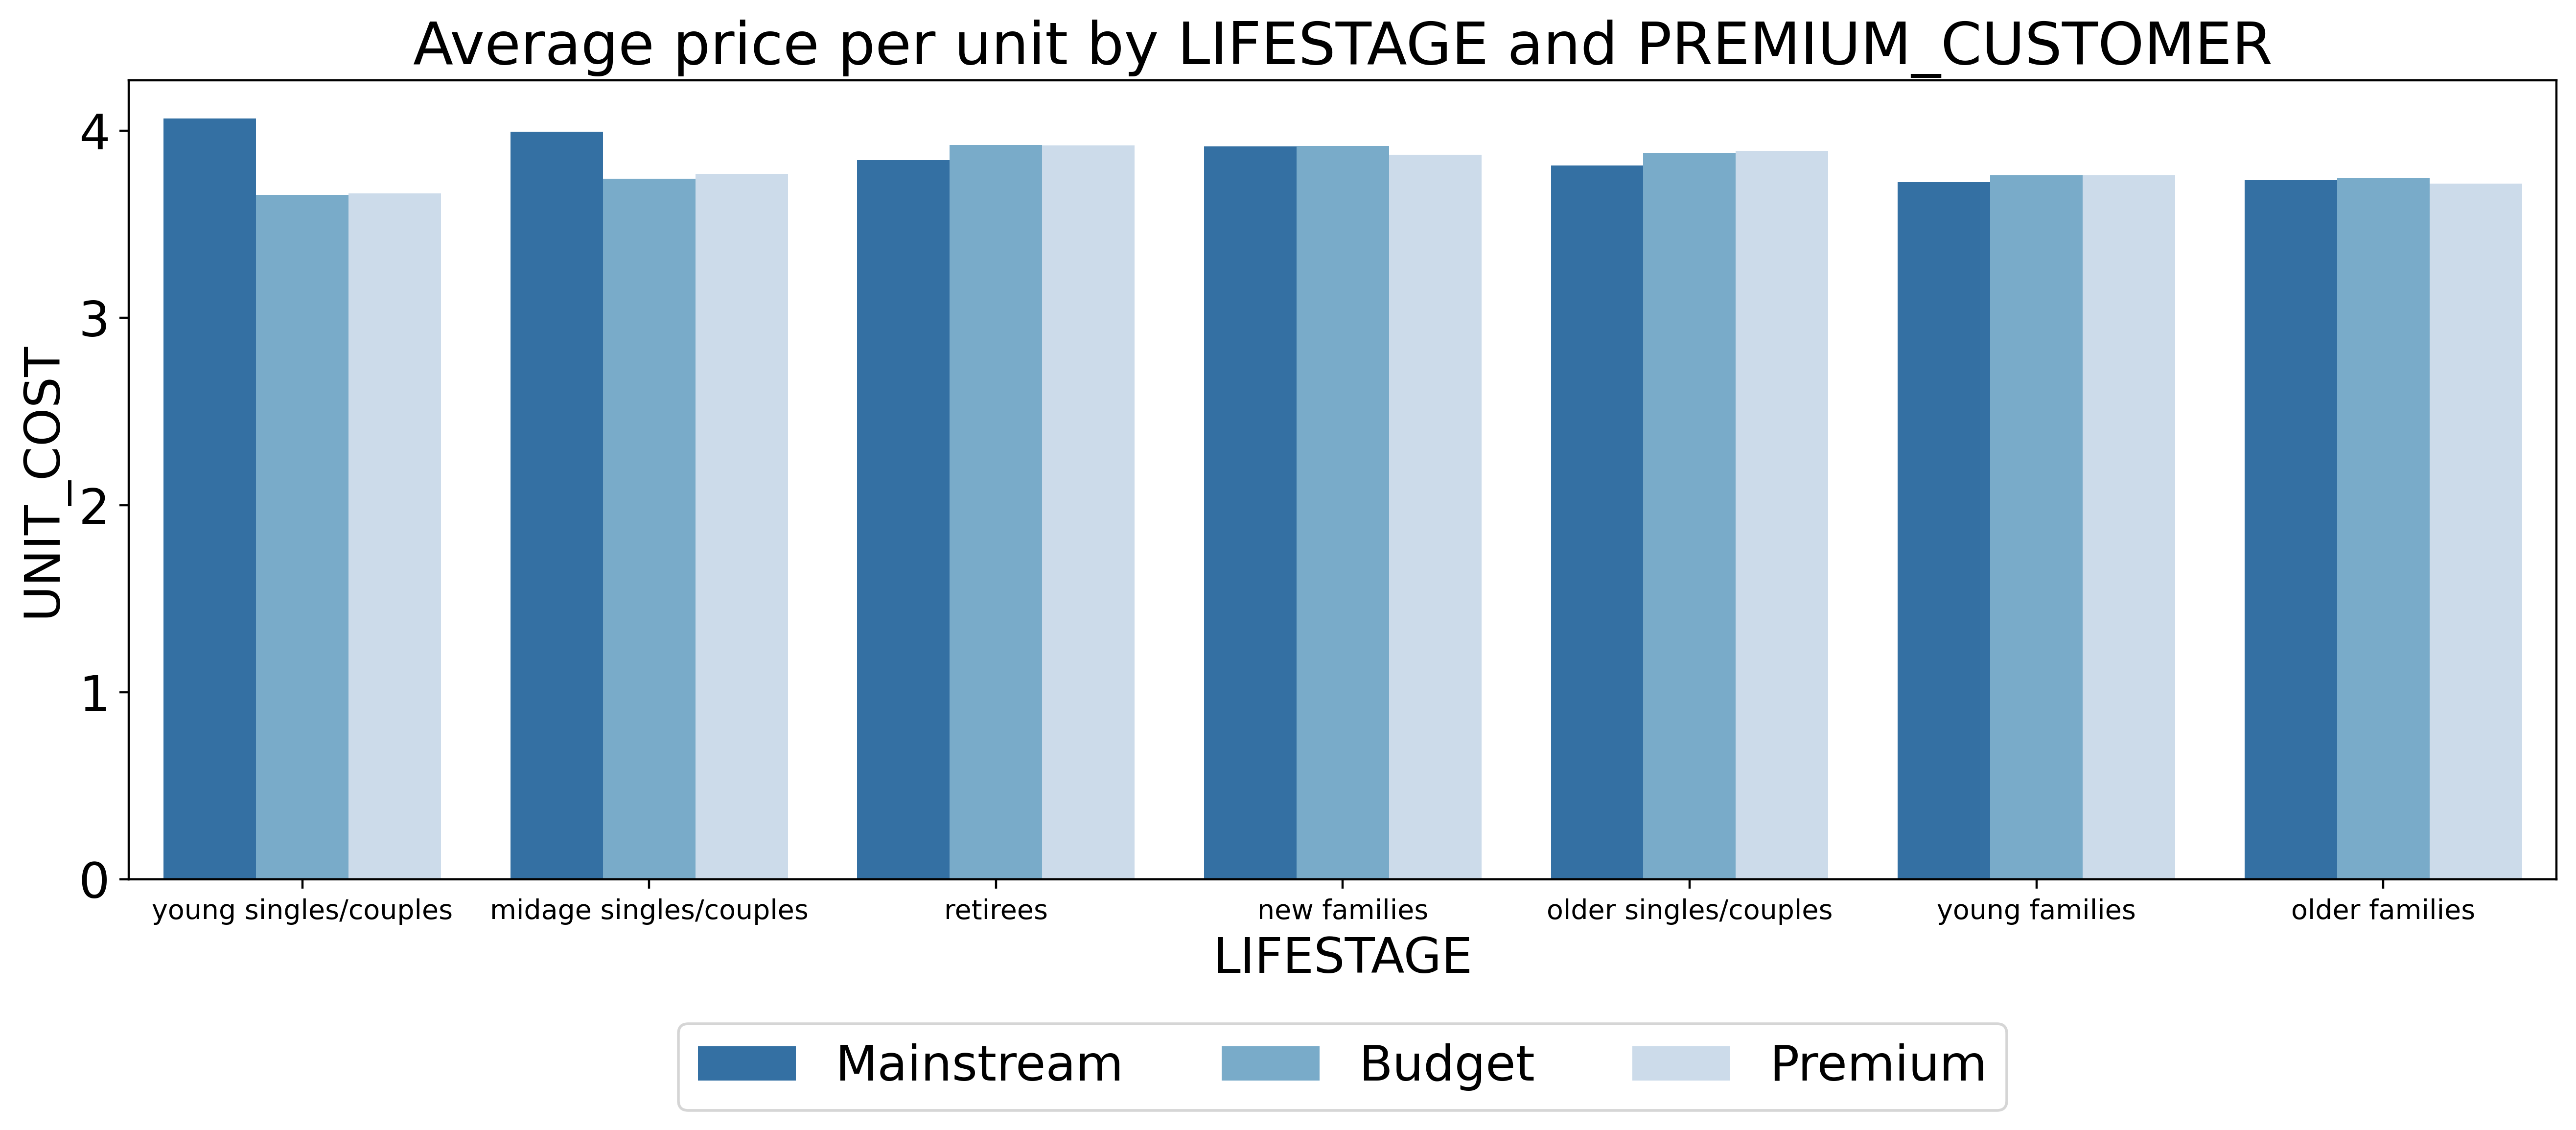

In [48]:
premium_status_qty = df.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])['UNIT_COST']\
                       .mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(16,6), dpi= 400);
ax = sb.barplot(x=premium_status_qty.LIFESTAGE,y=premium_status_qty.UNIT_COST,
              hue=premium_status_qty.PREMIUM_CUSTOMER,palette='Blues_r')

plt.xticks(fontsize=10)

# access axis object and change xlabels
ax.set_xticklabels([x.lower() for x in premium_status_qty.LIFESTAGE.unique()])

# adjust plot up
plt.subplots_adjust(bottom=0.2)

# place legend at bottom of plot
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)

plt.title('Average price per unit by LIFESTAGE and PREMIUM_CUSTOMER');
# plt.savefig('price_per_customer',dpi=120,bbox_inches='tight')

__Mainstream midage__ and __young singles and couples__ are more willing to pay more per packet of chips compared to their budget and premium counterparts. As discusses, prior, this is more incentive to increase sales to __young singles and couples__ as they tend to buy less quantities despite their willingness to pay more.

## __How significant are the differences between these two categories ?__

### __Independent T-test between mainstream (of midrange and young singles) vs. premium and budget (of midrange and young)__

__Alternate hypothesis__:the unit price for mainstream, 
young and mid-age singles and couples __ARE__ significantly higher than that of budget or premium, young and midage singles and couples
    
__Null hypothesis__ : the unit price for mainstream, 
young and mid-age singles and couples __ARE NOT__  significantly higher than that of budget or premium, young and midage singles and couples

* if p-value < 0.01 then we can reject the Null hypothesis
* if p-value > 0.01 then we cannot reject the Null the null hypothesis 

In [ ]:
mainstream = df.query("LIFESTAGE == ['MIDAGE SINGLES/COUPLES','YOUNG SINGLES/COUPLES']")\
        .query("PREMIUM_CUSTOMER == 'Mainstream'")\
        .UNIT_COST
premium_budget = df.query("LIFESTAGE == ['MIDAGE SINGLES/COUPLES','YOUNG SINGLES/COUPLES']")\
        .query("PREMIUM_CUSTOMER == ['Budget','Premium']")\
        .UNIT_COST

In [ ]:
def ans(s,p):
        if p < 0.01:
            different = 'ARE'
            print('The t-test results in a p-value of {}, i.e. the unit price for mainstream, young and mid-age singles and couples {} significantly higher than that of budget or premium, young and midage singles and couples.'.format(p,different))
        else:
            different = 'ARE NOT'
            print('The t-test results in a p-value of {}, i.e. the unit price for mainstream,\ young and mid-age singles and couples {} significantly higher than that of budget or premium, young and midage singles and couples.'.format(p,different))      
        
s,p = ttest_ind(mainstream,premium_budget)

ans(s,p)

The t-test results in a p-value of 2.235645611549355e-309, i.e. the unit price for mainstream, young and mid-age singles and couples ARE significantly higher than that of budget or premium, young and midage singles and couples.


## __What are the most prefered brands for these two segments ?__ 

### __Most prefered brands for mainstream MIDAGE SINGLES/COUPLES and YOUNG SINGLES/COUPLES (in descending order)__

In [49]:
mainstream = df.query("LIFESTAGE == ['MIDAGE SINGLES/COUPLES','YOUNG SINGLES/COUPLES']")\
             .query("PREMIUM_CUSTOMER == 'Mainstream'")
stats = pd.DataFrame(mainstream.PROD_BRAND.value_counts()).reset_index()\
                                    .rename(columns={'index':'PROD_BRAND','PROD_BRAND':'TXN_Counts'})
stats

PROD_BRAND 
 TXN_Counts 
 
 
 
 
 0 
 Kettle 
 5980 
 
 
 1 
 Pringles 
 3474 
 
 
 2 
 Doritos 
 3148 
 
 
 3 
 Smiths 
 2966 
 
 
 4 
 Thins 
 1801 
 
 
 5 
 RRD Red 
 1486 
 
 
 6 
 Infuzions 
 1484 
 
 
 7 
 Twisties 
 1390 
 
 
 8 
 Tostitos 
 1369 
 
 
 9 
 Cobs 
 1359 
 
 
 10 
 Tyrrells 
 917 
 
 
 11 
 Grain 
 883 
 
 
 12 
 WW 
 721 
 
 
 13 
 Cheezels 
 567 
 
 
 14 
 Natural 
 534 
 
 
 15 
 Infzns 
 445 
 
 
 16 
 Dorito 
 441 
 
 
 17 
 CCs 
 381 
 
 
 18 
 Cheetos 
 281 
 
 
 19 
 Smith 
 231 
 
 
 20 
 NCC 
 131 
 
 
 21 
 French 
 121 
 
 
 22 
 GrnWves 
 118 
 
 
 23 
 Burger 
 110 
 
 
 24 
 Snbts 
 107 
 
 
 25 
 Woolworths 
 104 
 
 
 26 
 Sunbites 
 90

### __Most prefered brands for Budget & Premium MIDAGE SINGLES/COUPLES and YOUNG SINGLES/COUPLES (in descending order)__

In [50]:
premium_budget = df.query("LIFESTAGE == ['MIDAGE SINGLES/COUPLES','YOUNG SINGLES/COUPLES']")\
        .query("PREMIUM_CUSTOMER == ['Budget','Premium']")
stats2 = pd.DataFrame(premium_budget.PROD_BRAND.value_counts()).reset_index()\
                                    .rename(columns={'index':'PROD_BRAND','PROD_BRAND':'TXN_Counts'})

In [ ]:
print('It can be seen that the top 5 most prefered brands for mainstream MIDAGE SINGLES/COUPLES and YOUNG SINGLES/COUPLES  (in decreasing order) are: {}.While that for Budget,Premium are {}'\
    .format(stats.index[:5].values, stats2.index[:5].values))

It can be seen that the top 5 most prefered brands for mainstream MIDAGE SINGLES/COUPLES and YOUNG SINGLES/COUPLES  (in decreasing order) are: [0 1 2 3 4].While that for Budget,Premium are [0 1 2 3 4]


Both customer segments have a preference for similar brands as their top 5 brands are almost the same.

In [ ]:
print('It can be seen that the top 5 least prefered brands for mainstream MIDAGE SINGLES/COUPLES and YOUNG SINGLES/COUPLES  (in decreasing order) are: {}.While that for Budget,Premium are {}.'\
    .format(stats.index[-5:].values, stats2.index[-5:].values))

It can be seen that the top 5 least prefered brands for mainstream MIDAGE SINGLES/COUPLES and YOUNG SINGLES/COUPLES  (in decreasing order) are: [22 23 24 25 26].While that for Budget,Premium are [22 23 24 25 26].


Therefore,it would be beneficial to increase stocks of Kettle, Pringles, Doritos, Smiths, Thins and RRD Red brands as they are most prefered by customer segments while reducing stock of GrnWves, Burger, Snbts, Woolworths, Sunbites, French, NCC.

In [51]:
mainstream_sizes = mainstream.PACK_SIZE.value_counts()

pd.DataFrame(mainstream_sizes).reset_index()\
                     .rename(columns={'index':'STORE_NBR','PACK_SIZE':'TXN_Counts'})

STORE_NBR 
 TXN_Counts 
 
 
 
 
 0 
 175 
 7972 
 
 
 1 
 150 
 4857 
 
 
 2 
 134 
 3474 
 
 
 3 
 110 
 3175 
 
 
 4 
 170 
 2457 
 
 
 5 
 330 
 1863 
 
 
 6 
 165 
 1743 
 
 
 7 
 270 
 963 
 
 
 8 
 380 
 936 
 
 
 9 
 210 
 883 
 
 
 10 
 135 
 453 
 
 
 11 
 250 
 427 
 
 
 12 
 200 
 311 
 
 
 13 
 190 
 264 
 
 
 14 
 160 
 229 
 
 
 15 
 90 
 197 
 
 
 16 
 180 
 118 
 
 
 17 
 70 
 113 
 
 
 18 
 220 
 110 
 
 
 19 
 125 
 94

In [57]:
premium_budget_size = premium_budget.STORE_NBR.value_counts().head(20)

premium_budget_size = pd.DataFrame(premium_budget_size).reset_index()\
                     .rename(columns={'index':'STORE_NBR','STORE_NBR':'TXN_Counts'})
premium_budget_size

STORE_NBR 
 TXN_Counts 
 
 
 
 
 0 
 247 
 197 
 
 
 1 
 153 
 192 
 
 
 2 
 165 
 189 
 
 
 3 
 23 
 182 
 
 
 4 
 94 
 172 
 
 
 5 
 201 
 171 
 
 
 6 
 175 
 170 
 
 
 7 
 217 
 168 
 
 
 8 
 57 
 167 
 
 
 9 
 55 
 166 
 
 
 10 
 128 
 165 
 
 
 11 
 157 
 164 
 
 
 12 
 95 
 164 
 
 
 13 
 236 
 160 
 
 
 14 
 164 
 158 
 
 
 15 
 110 
 157 
 
 
 16 
 79 
 156 
 
 
 17 
 7 
 156 
 
 
 18 
 65 
 156 
 
 
 19 
 237 
 154

In [59]:
print('Additionlly, the top 5 most prefered sizes by mainstream MIDAGE SINGLES/COUPLES and YOUNG SINGLES/COUPLES  (in decreasing order) are: {}.While that for Budget,Premium are {}. The least frequented shop are {} and {} respectively'\
    .format(mainstream_sizes.index[:5]\
    .values, premium_budget_size.index[:5]\
    .values,mainstream_sizes.index[-5:]\
    .values, premium_budget_size.index[-5:].values ))

Additionlly, the top 5 most prefered sizes by mainstream MIDAGE SINGLES/COUPLES and YOUNG SINGLES/COUPLES  (in decreasing order) are: [175 150 134 110 170].While that for Budget,Premium are [0 1 2 3 4]. The least frequented shop are [ 90 180  70 220 125] and [15 16 17 18 19] respectively


Therefore, stock more of sizes 175 150 134 110 170 of the top 5 brands of mainstream MIDAGE SINGLES/COUPLES and YOUNG SINGLES/COUPLES. And for Budget and Premium products, stock more of sizes 247 153 165  23  94 as they could result in increase sales.

## __which stores are doing the most transactions ?__

### __Analyse transactions per store (focused on top 20)__

In [60]:
store = pd.DataFrame(df.STORE_NBR.value_counts(ascending=False)\
                     .head(20))\
                     .reset_index()\
                     .rename(columns={'index':'STORE_NBR','STORE_NBR':'TXN_Counts'})

store.STORE_NBR = store.STORE_NBR.astype('str')
store

STORE_NBR 
 TXN_Counts 
 
 
 
 
 0 
 226 
 1916 
 
 
 1 
 88 
 1786 
 
 
 2 
 165 
 1741 
 
 
 3 
 237 
 1714 
 
 
 4 
 93 
 1699 
 
 
 5 
 40 
 1653 
 
 
 6 
 58 
 1644 
 
 
 7 
 43 
 1622 
 
 
 8 
 230 
 1609 
 
 
 9 
 213 
 1606 
 
 
 10 
 199 
 1604 
 
 
 11 
 152 
 1594 
 
 
 12 
 156 
 1592 
 
 
 13 
 63 
 1587 
 
 
 14 
 100 
 1585 
 
 
 15 
 4 
 1585 
 
 
 16 
 128 
 1578 
 
 
 17 
 201 
 1575 
 
 
 18 
 133 
 1573 
 
 
 19 
 203 
 1570

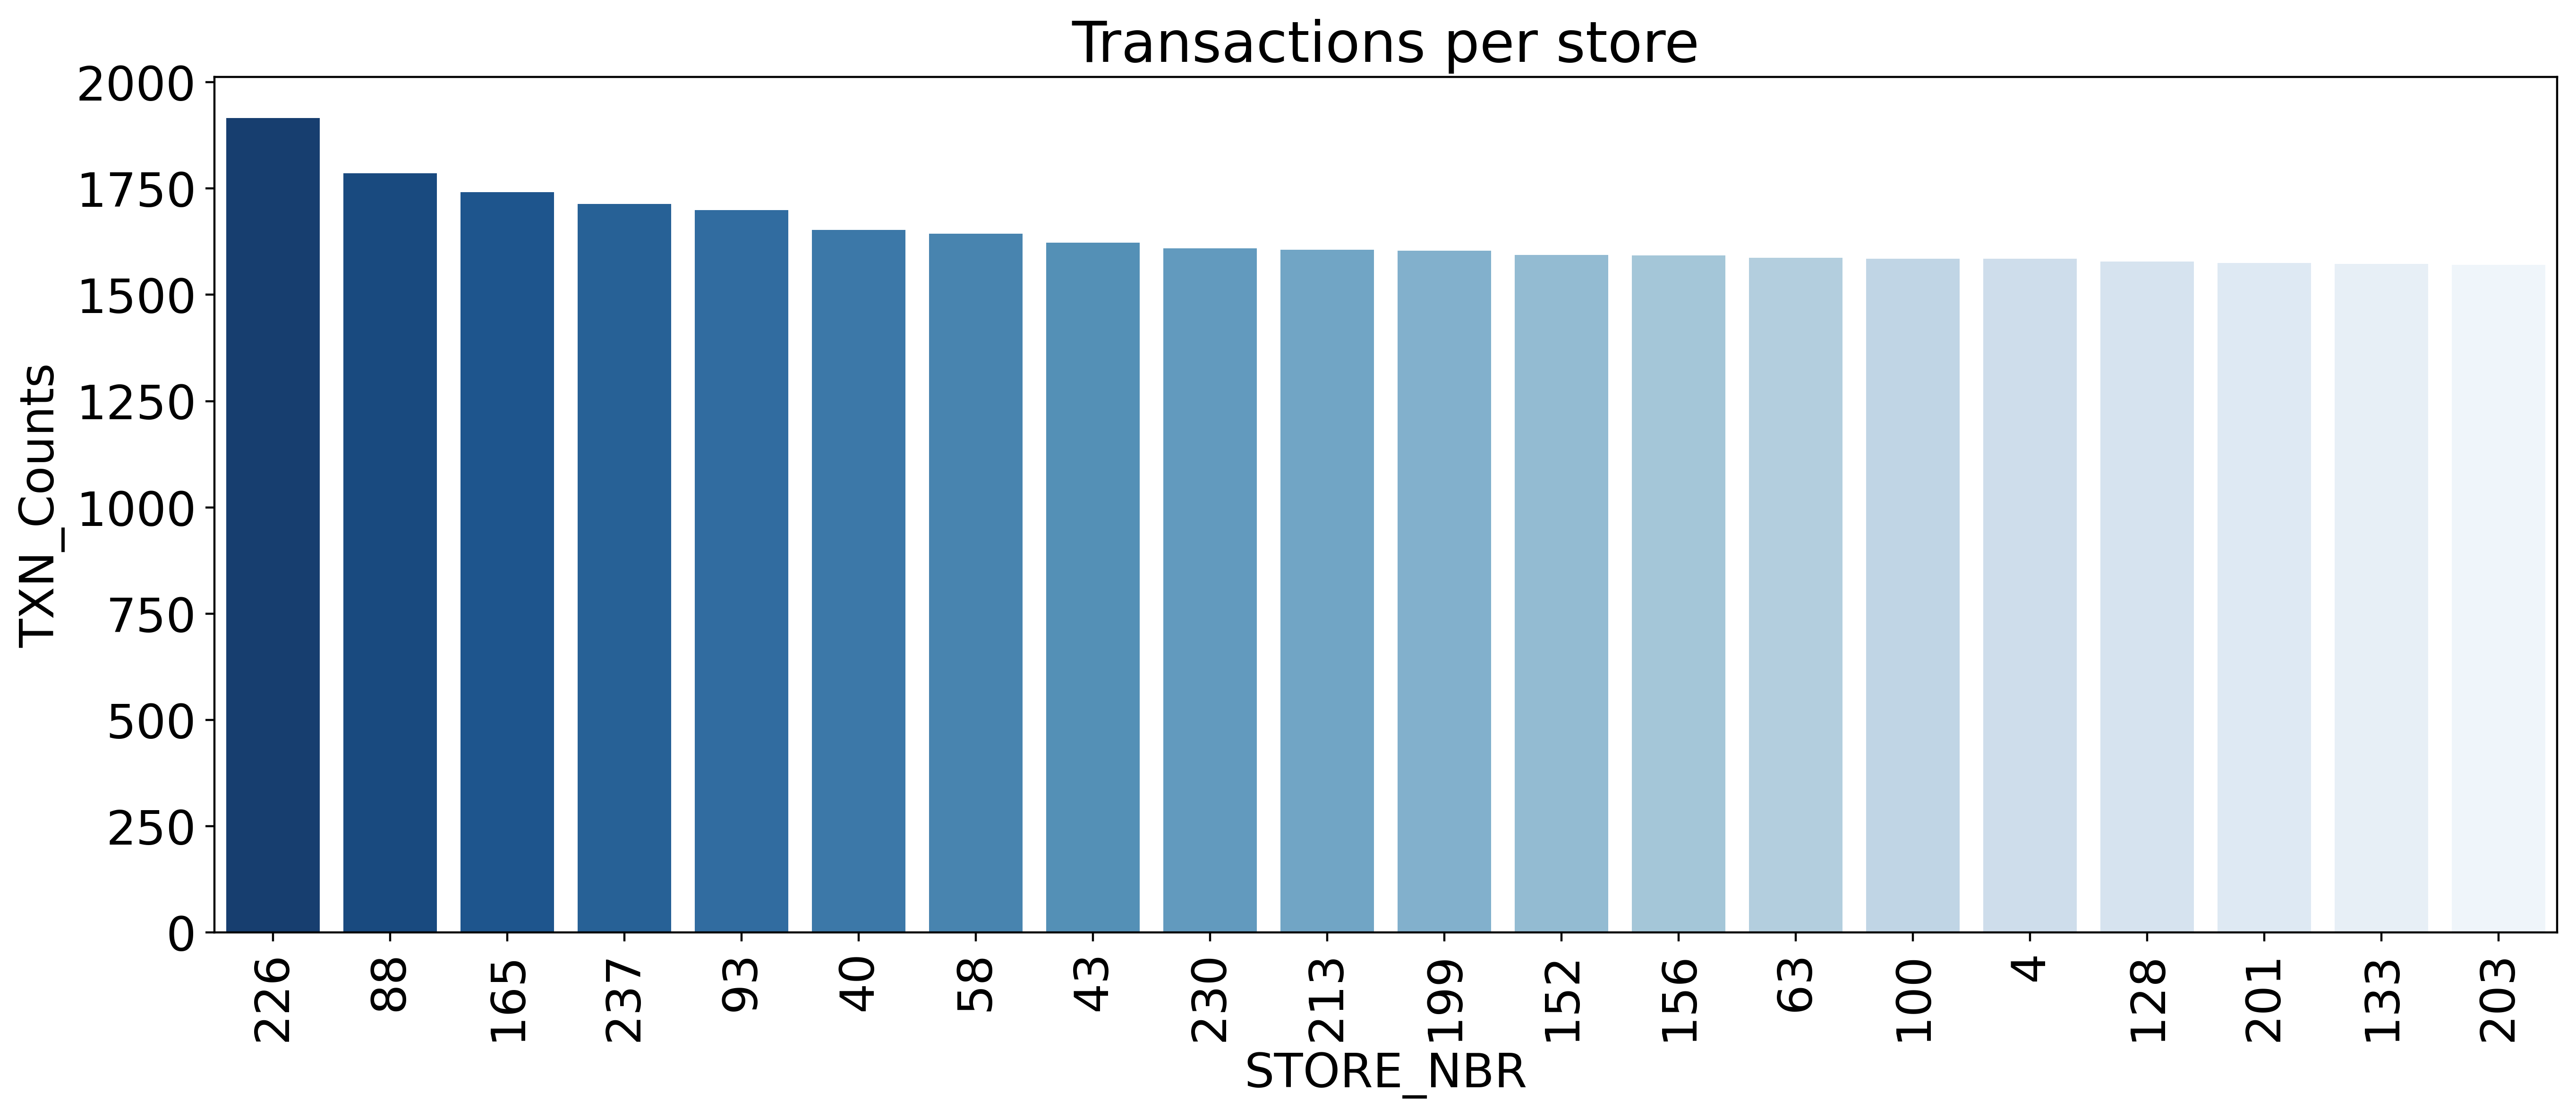

In [61]:
plt.figure(figsize=(16,6), dpi =400)
sb.barplot(x=store.STORE_NBR,y= store.TXN_Counts, palette='Blues_r');
plt.xticks(rotation = 90);
plt.title('Transactions per store');

The top 5 stores (descending order) with the most transactions are store number: 226, 88, 165, 237 and 93. Therefore you can start by to applying the strategies tp these stores that see the most transcations.

# __Strategy & Conclusions__
<a id="conclusion"></a>

__`Data Analytics Report`__:

__`Introduction`__:
After analyzing the dataset of the purchasing behavior of customers buying chips in a particular region. I present my findings to Julia - Category Manager, to fascilitate better understanding on the types of customers who purchase chips, their purchasing behavior and to unearth insigths to drive strategy and increase sales.

__`Findings`__:
The daily average transaction of chips hovered around `$678` throughout the year except in early December, where it shot up to a little above $859 before returning to normal levels. Similar trend was observed in weekly total transactions, which remained stable around the mean of 4655 up until early December, which recorded a drastic increase in sales before crashing to below average in early January and recovering in February.

Further analysis of the trend confirms that the daily transactions increase leading up to the 25th (Christmas day) before crashing to zero, as shops close for Christmas. They then reopen on the 26th and transactions recover steadily to average levels. Out of all the pack sizes, the most purchased pack sizes among customers are 175g, 150g, 134g, 110g, 170g, and 165g. Kettle, Smiths, Pringles, and Doritos are the top 4 brands most preferred by customers.

The top 3 buyers in descending order are older single/couples, retirees, and older families. However, this information does not reveal much about the types of chips they purchase. Further examination of purchase status reveals that sales are coming mainly from Budget-older-families, Mainstream-young-singles/couples, Mainstream-retirees, and Budget-young-families. The product quantity purchased closely mirrors the trend of total sales, further validating the findings.

Although there are more Mainstream-young-singles/couples and Mainstream-retirees who buy chips and make up the 2nd and 3rd most sales, they buy fewer units per customer than the other segments. Therefore there is more potential to increase sales from this segment. A good strategy would be for stores to increase the number of units sold to this customer segment to realize increased sales.

The average price per packet of chips is higher for Mainstream midage and young singles/couples compared to their budget and premium counterparts. Independent t-test results in a p-value of 2.235645611549355e-309, i.e. the unit price for mainstream, young and mid-age singles and couples is significantly higher than that of budget or premium, young and midage singles and couples.

__`Conclusion`__:

Based on the findings, the Category Manager should prioritize stocking the top 4 preferred brands (Kettle, Pringles, Doritos, Smiths) over the less popular brands (GrnWves, Burger, Snbts, Woolworths, Sunbites, French, NCC). Also, the main customer segments driving sales are Budget-older-families, Mainstream-young-singles/couples, Mainstream-retirees, and Budget-young-families, thus they should be the primary targets for marketing and promotions.

Further more, to increase sales, it is advised to stock more of the preferred chip sizes (175, 150, 134, 110, 170) for mainstream MIDAGE SINGLES/COUPLES and YOUNG SINGLES/COUPLES. Also, for Budget and Premium products, sizes 247, 153, 165, 23, and 94 are recommended.

It also worth mentioning that, stores should increase the number of units sold to the Mainstream-young-singles/couples and Mainstream-retirees segments. Additionally, since Mainstream midage and young singles/couples are more willing to pay more per packet of chips, it may be beneficial to slightly increase prices for these segments.

Lastly, it is suggested to pilot these recommendations at the top-selling stores (226, 88, 165, 237, and 93) to test their effectiveness before implementing them across all stores.